**Analyse et segmentation de clientèle d'un magasin avec campagnes de marketing**
_Jules EXBRAYAT & Abdenour MADANI_

# Présentation

## Problématique

Quel est le client type de l'entreprise ?

Peut-on créer des groupes de clients, afin de cibler efficacement les potentiels clients et personnalisé la campagne marketing ?

## Jeu de données

### Lecture des données

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
sns.set_theme()

In [ ]:
df = pd.read_csv("marketing_campaign.csv", sep="\t", index_col="ID", parse_dates=True)

### Présentation des variables

In [ ]:
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                        
5524        1957  Graduation         Single  58138.0        0         0   
2174        1954  Graduation         Single  46344.0        1         1   
4141        1965  Graduation       Together  71613.0        0         0   
6182        1984  Graduation       Together  26646.0        1         0   
5324        1981         PhD        Married  58293.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
ID                                              ...                      
5524  04-09-2012       58       635         88  ...                  7   
2174  08-03-2014       38        11          1  ...                  5   
4141  21-08-2013       26       426         49  ...                  4   
6182  10-02-2014       26        11          4  ...                  6   
5324  19-01-2014       94       173         43  ...                  5   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
ID                                                                           
5524             0             0             0             0             0   
2174             0             0             0             0             0   
4141             0             0             0             0             0   
6182             0             0             0             0             0   
5324             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
ID                                                  
5524         0              3         11         1  
2174         0              3         11         0  
4141         0              3         11         0  
6182         0              3         11         0  
5324         0              3         11         0  

[5 rows x 28 columns]

In [ ]:
print(f"Il y a {df.shape[1]} variables et {df.shape[0]} individus.")

Il y a 28 variables et 2240 individus.


#### Variables

- ID: identifiant du client
- Year_Birth: numérique, année de naissance du client
- Education: qualitative, niveau d'éducation
- Marital_Status: qualitative, statut marital
- Income: numérique, revenu annuel en $
- Kidhome: numérique, nombre d'enfants en bas-âge
- Teenhome: numérique, nombre d'enfants adolescents
- Dt_Customer: date, date à laquelle le client s'est inscrit
- Recency: numérique, nombre de jours depuis le dernier achat
- Complain: catégorique, est-ce que le client s'est plaint les 2 dernières années (0 ou 1)

#### Products

- MntWines: numérique, argent dépensé les 2 dernières années en vin
- MntFruits: numérique, argent dépensé les 2 dernières années en fruits
- MntMeatProducts: numérique, argent dépensé les 2 dernières années en viande
- MntFishProducts: numérique, argent dépensé les 2 dernières années en poisson
- MntSweetProducts: numérique, argent dépensé les 2 dernières années en bonbons / gâteaux
- MntGoldProds: numérique, argent dépensé les 2 dernières années en bijoux / or

#### Promotion

- NumDealsPurchases: numérique, nombre d'achats effectués avec une promotion
- AcceptedCmp1: catégorique, le client a-t-il acheté durant la campagne promotionnelle numéro 1 (1 s'il a acheté, 0 sinon)
- AcceptedCmp2: pareil pour la campagne numéro 2
- AcceptedCmp3: pareil pour la campagne numéro 3
- AcceptedCmp4: pareil pour la campagne numéro 4
- AcceptedCmp5: pareil pour la campagne numéro 5
- Response: catégorique, 1 si le client a acheté durant la dernière campagne, 0 sinon (potentielle variable à prédire)

#### Place

- NumWebPurchases: numérique, nombre d'achats effectués sur le site Internet
- NumCatalogPurchases: numérique, nombre d'achats effectués via le catalogue
- NumStorePurchases: numérique, nombre d'achats effectués en magasin
- NumWebVisitsMonth: numérique, nombre de visites sur le site Internet le dernier mois


In [ ]:
var_numeriques = [
    "Year_Birth",
    "Income",
    "Kidhome",
    "Teenhome",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
]

In [ ]:
var_categoriques = [
    "Education",
    "Marital_Status",
    "Complain",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
]

In [ ]:
# todo: gérer "Dt_Customer", qui est une date et pas catégorique

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

# Découverte des données

In [ ]:
# todo :
# - matrice de corrélation

## Analyse univariée (?)

In [ ]:
df.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52247.251354     0.444196     0.506250    49.109375   
std      11.984069   25173.076661     0.538398     0.544538    28.962453   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count       2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean          27.062946  ...           5.316518      0.072768      0.074554   
std           41.280498  ...           2.426645      0.259813      0.262728   
min            0.000000  ...           0.000000      0.000000      0.000000   
25%            1.000000  ...           3.000000      0.000000      0.000000   
50%            8.000000  ...           6.000000      0.000000      0.000000   
75%           33.000000  ...           7.000000      0.000000      0.000000   
max          263.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 25 columns]

In [ ]:
# todo: commenter

## Visualisation

### Variables numériques

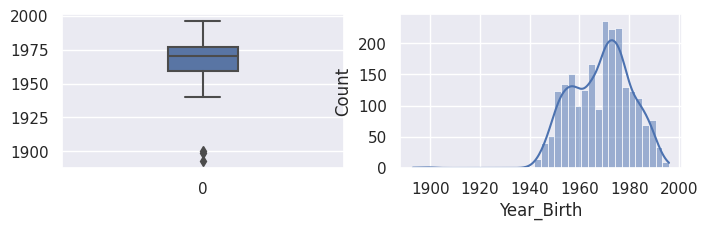

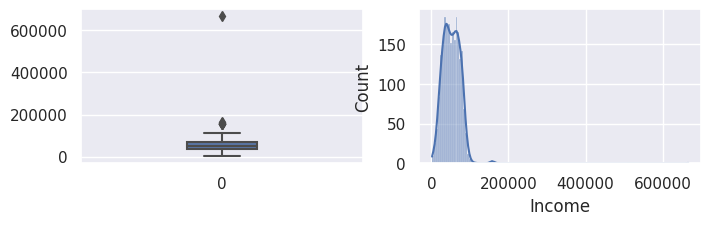

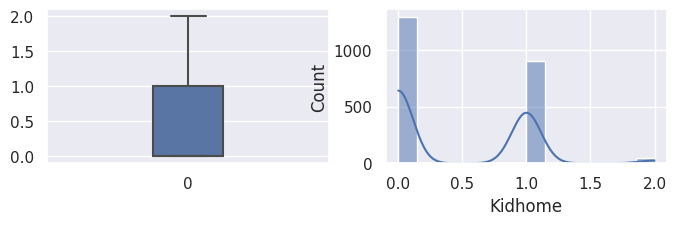

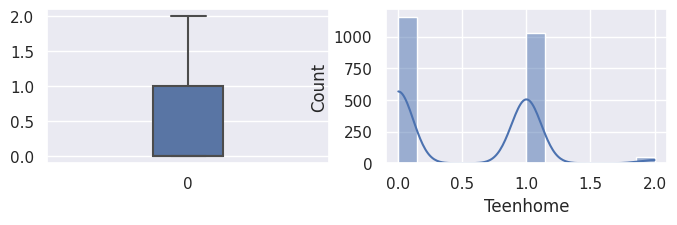

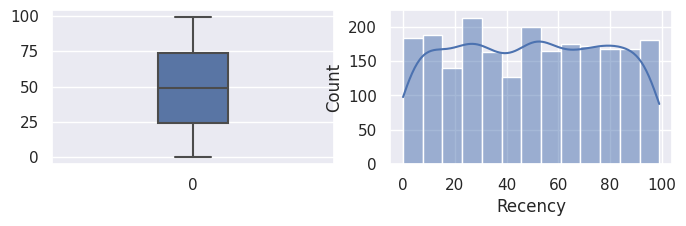

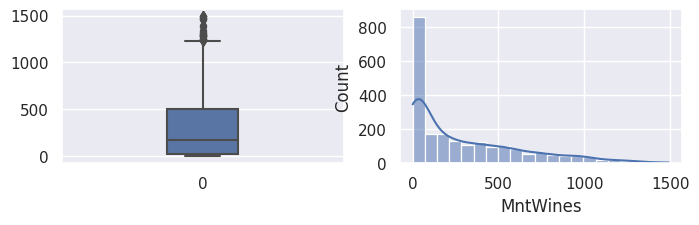

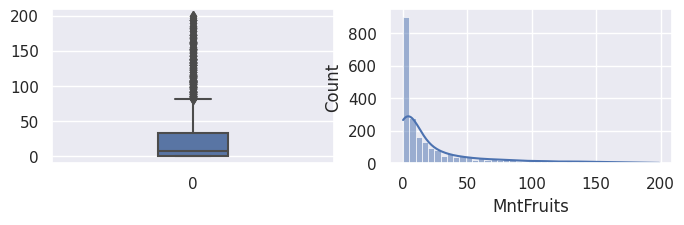

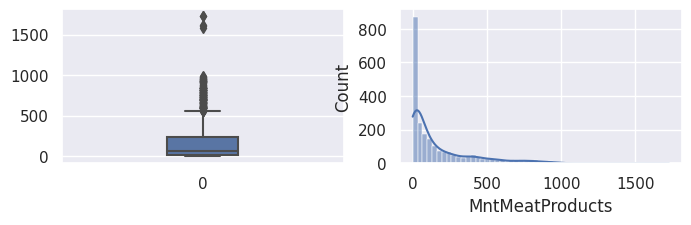

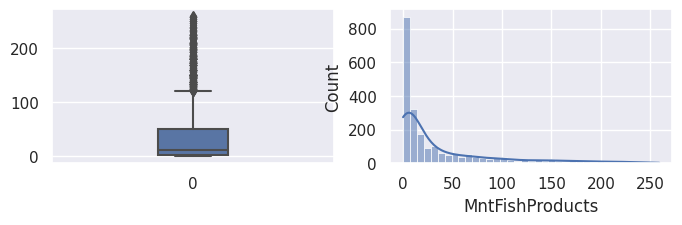

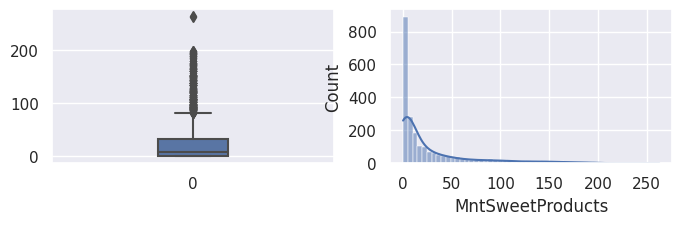

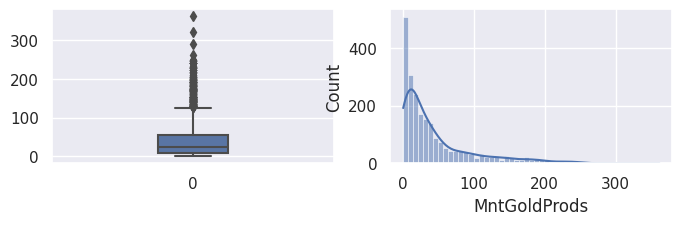

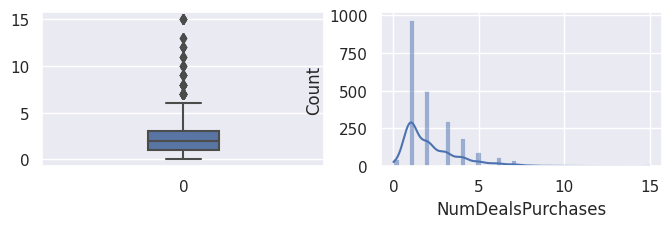

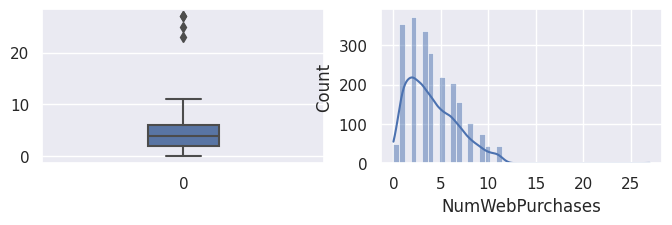

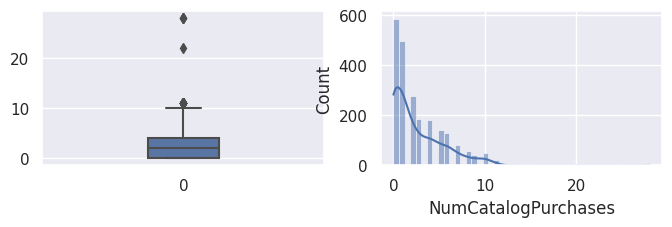

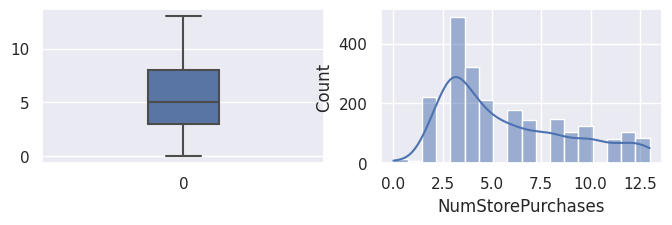

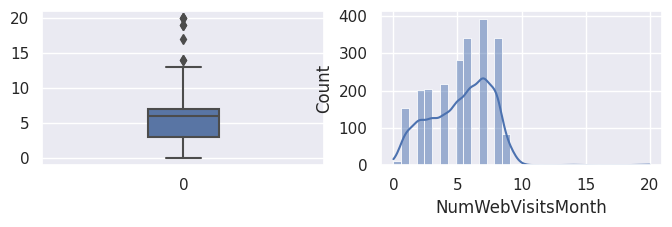

In [ ]:
for var in var_numeriques:
    _, ax = plt.subplots(1, 2, figsize=(8, 2))
    sns.boxplot(df[var], width=0.25, ax=ax[0])
    sns.histplot(df[var], kde=True, ax=ax[1])
    plt.show()

In [ ]:
# todo: commenter

### Variables catégoriques

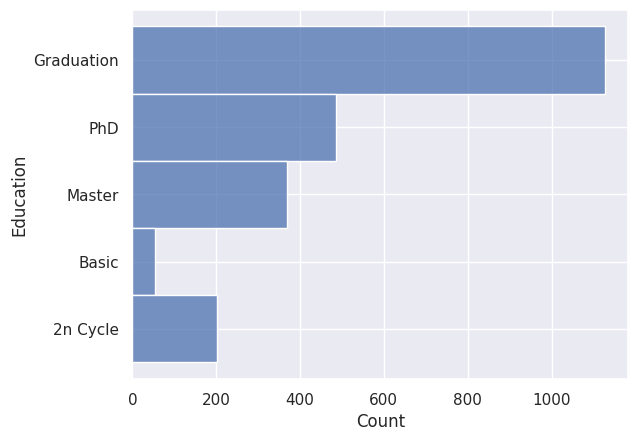

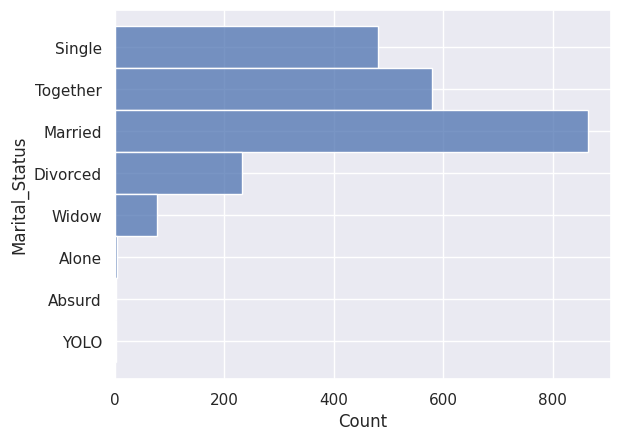

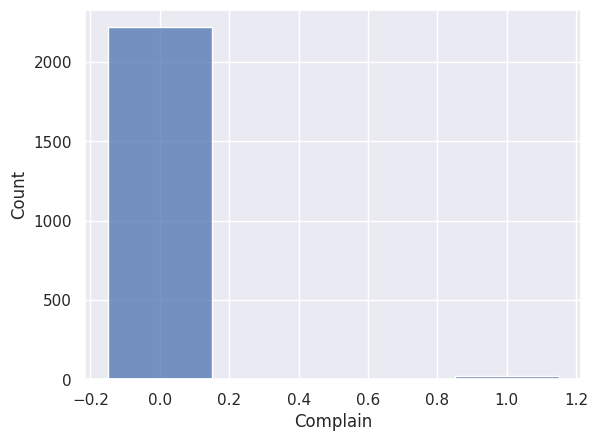

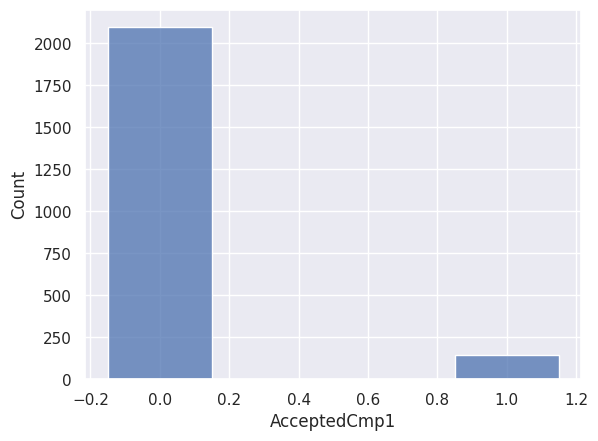

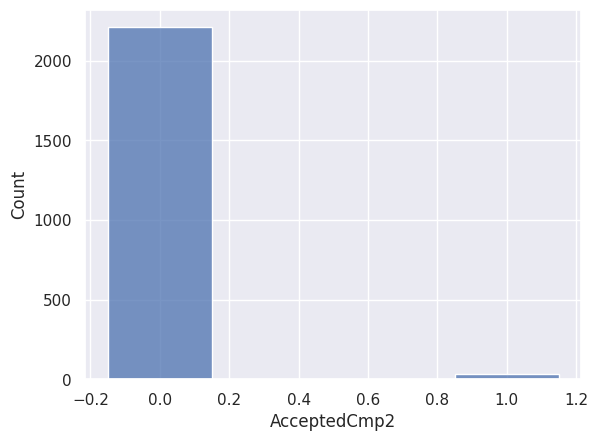

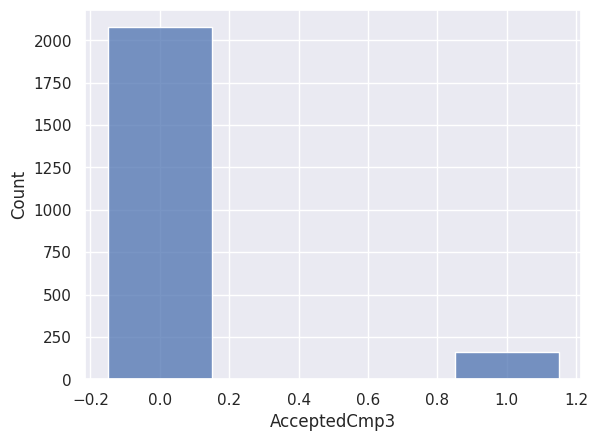

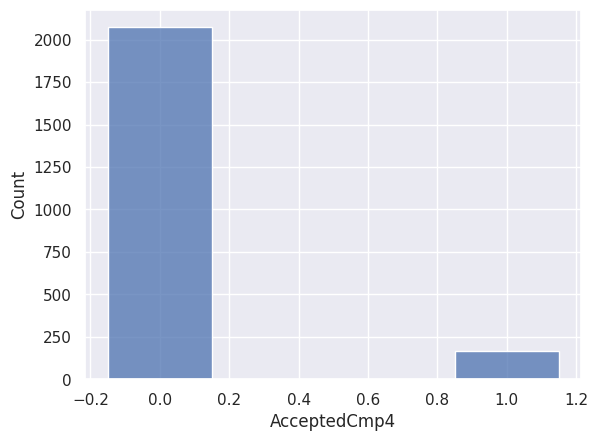

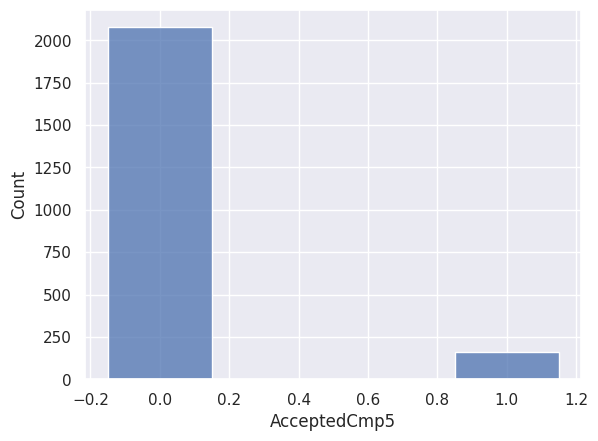

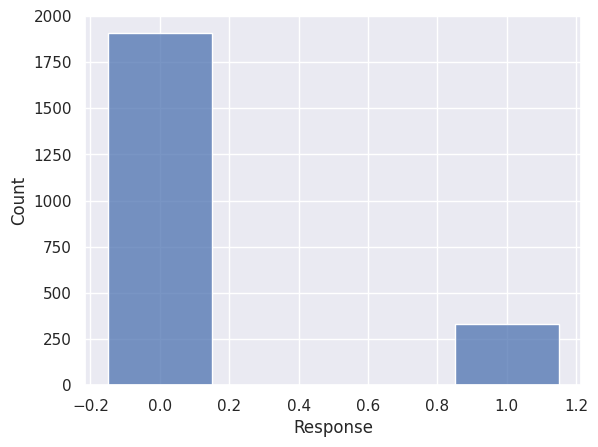

In [ ]:
for var in var_categoriques:
    if len(df[var].unique()) > 3:
        sns.histplot(y=df[var])
    else:
        sns.histplot(df[var], discrete=True, shrink=0.3)
    plt.show()

In [ ]:
# todo: commenter

In [ ]:
len(df.loc[(df["AcceptedCmp2"] == 1) & (df["AcceptedCmp1"] == 1), :])

13

In [ ]:
len(
    df.loc[
        (df["AcceptedCmp1"] == 1)
        & (df["AcceptedCmp2"] == 1)
        & (df["AcceptedCmp3"] == 1),
        :,
    ]
)

3

In [ ]:
len(
    df.loc[
        (df["AcceptedCmp1"] == 1)
        | (df["AcceptedCmp2"] == 1)
        | (df["AcceptedCmp3"] == 1)
        | (df["AcceptedCmp4"] == 1)
        | (df["AcceptedCmp5"] == 1),
        :,
    ]
)

463

# Nettoyage des données

## Données parasites


### Variables

Dans le jeu de données, 2 colonnes sont non documentées et contiennent des valeurs constantes :
- `Z_CostContact`
- `Z_Revenue`

**Variable `Z_CostContact`**

In [ ]:
# todo: refaire ça propre

In [ ]:
print(
    f'Il y a {np.sum(df["Z_CostContact"] == 3)} / 2240 individus pour lesquelles la variable Z_CostContact vaut 3.'
)

Il y a 2240 / 2240 individus pour lesquelles la variable Z_CostContact vaut 3.


<Axes: xlabel='Z_CostContact', ylabel='Count'>

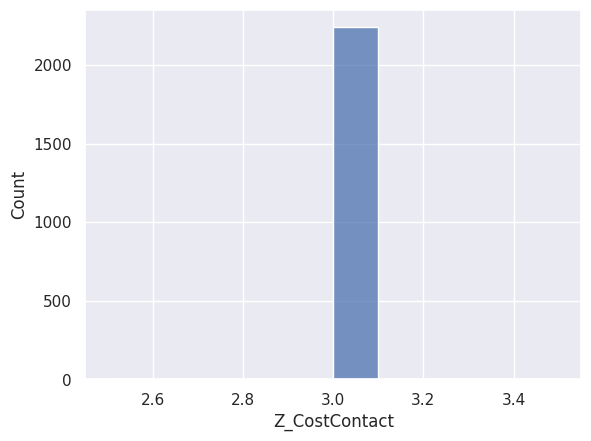

In [ ]:
sns.histplot(df["Z_CostContact"], bins=10)

**Variable `Z_Revenue`**

Il y a 2240 / 2240 individus pour lesquelles la variable Z_Revenue vaut 11.


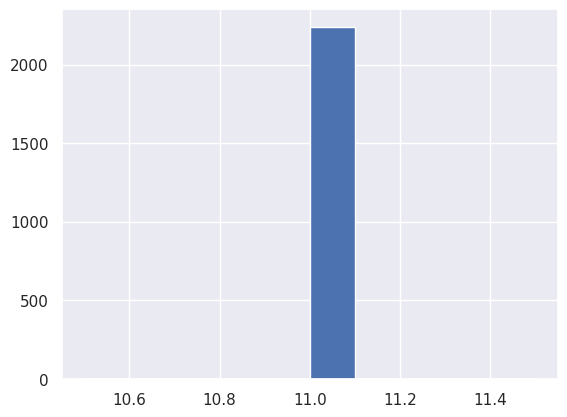

In [ ]:
print(
    f'Il y a {np.sum(df["Z_Revenue"] == 11)} / 2240 individus pour lesquelles la variable Z_Revenue vaut 11.'
)

plt.hist(df["Z_Revenue"])
plt.show()

On décide de les supprimer, car elles sont parasites et ne fournissent pas d'information.

In [ ]:
df.drop(columns=["Z_CostContact", "Z_Revenue"], inplace=True)

### Valeurs

#### Statut marital

<Axes: xlabel='Count', ylabel='Marital_Status'>

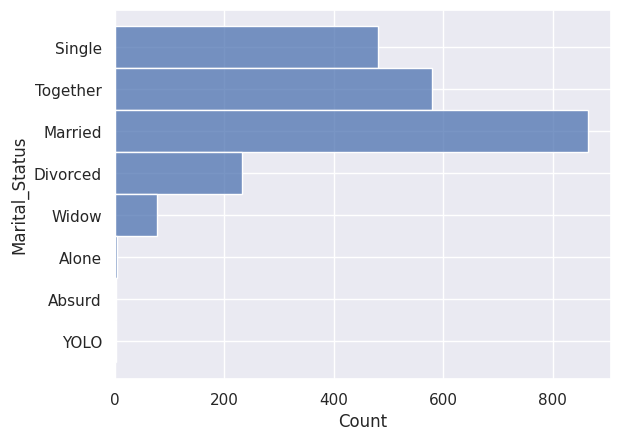

In [ ]:
sns.histplot(y=df["Marital_Status"])

Parmi les situations maritales, on observe "absurde" et "YOLO" (You Only Live Once, _on ne vit qu'une fois_).

Comme on ne peut pas déduire ce que veut dire "absurde" dans ce contexte, on se décide de supprimer l'individu.
De même, on suppose que la personne ayant répondu "YOLO", donc ayant répondu de façon humoristique, doit être supprimée du jeu de données.

In [ ]:
df.drop(index=df.loc[df["Marital_Status"] == "YOLO"].index, inplace=True)
df.drop(index=df.loc[df["Marital_Status"] == "Absurd"].index, inplace=True)

<Axes: xlabel='Count', ylabel='Marital_Status'>

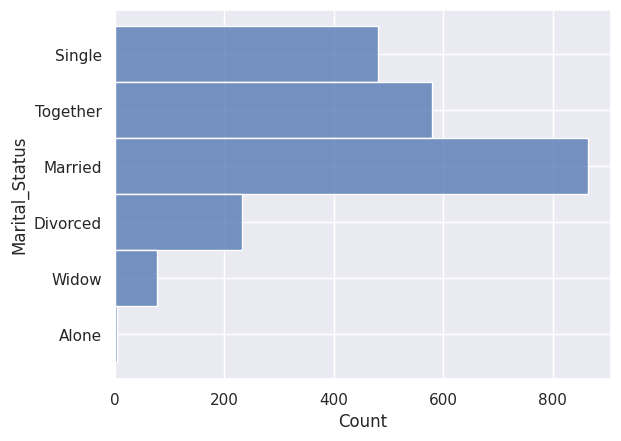

In [ ]:
sns.histplot(y=df["Marital_Status"])

## Données dupliquées

### Individus

In [ ]:
df.duplicated()

ID
5524     False
2174     False
4141     False
6182     False
5324     False
         ...  
10870    False
4001      True
7270     False
8235     False
9405     False
Length: 2236, dtype: bool

In [ ]:
sum(df.duplicated())

182

Nous observons qu'il y a 182 lignes qui sont dupliquées.

Nous pouvons supposer que les données ont été fusionnées à partir de plusieurs sources, et que ces sources avaient des individus en commun : nous décidons donc de supprimer les doublons.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
sum(df.duplicated())

0

## Variables pas assez informatives

In [ ]:
# todo: dire que la variable "Complain" (si le client s'est plaint ou non), n'apporte pas assez d'information pour être gardée, car il y a moins de 1% des observations qui ont une classe autre que "0", et qu'en plus ce n'est pas central à notre étude

In [ ]:
# todo: essayer quand même une visualisation des individus s'étant plaint par rapport à nos variables cibles, au cas où...

<Axes: >

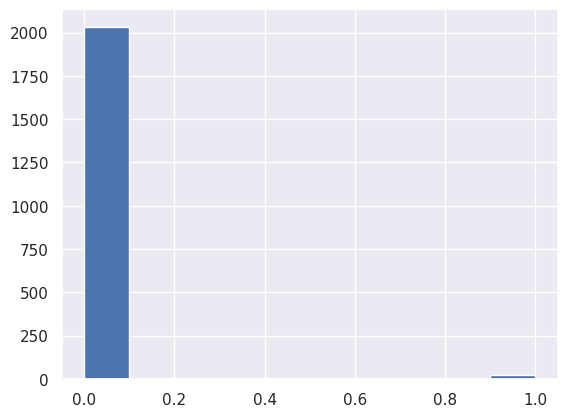

In [ ]:
df["Complain"].hist()

In [ ]:
100 * df["Complain"].sum() / len(df["Complain"])

0.9737098344693281

## Standardisation

### Modalités de variables catégoriques

<Axes: xlabel='Count', ylabel='Marital_Status'>

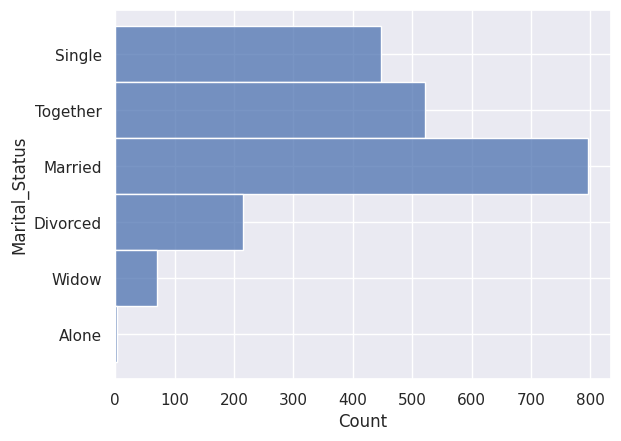

In [ ]:
sns.histplot(y=df["Marital_Status"])

Sans plus d'information, "Alone" est une autre formulation de "Single", on décide donc de remplacer "Alone" par "Single".

In [ ]:
df["Marital_Status"].replace("Alone", "Single", inplace=True)

<Axes: xlabel='Count', ylabel='Marital_Status'>

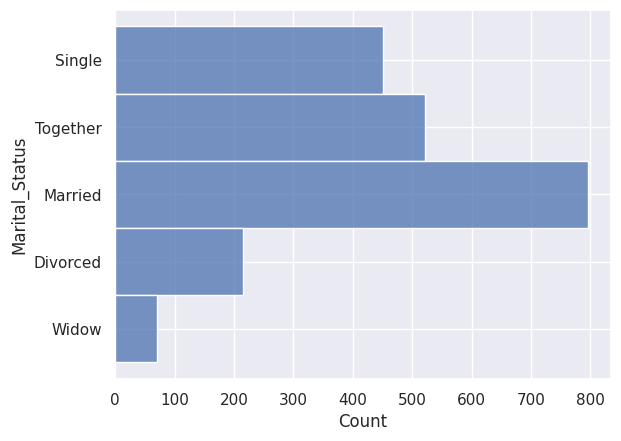

In [ ]:
sns.histplot(y=df["Marital_Status"])

## Valeurs extrêmes

### Income

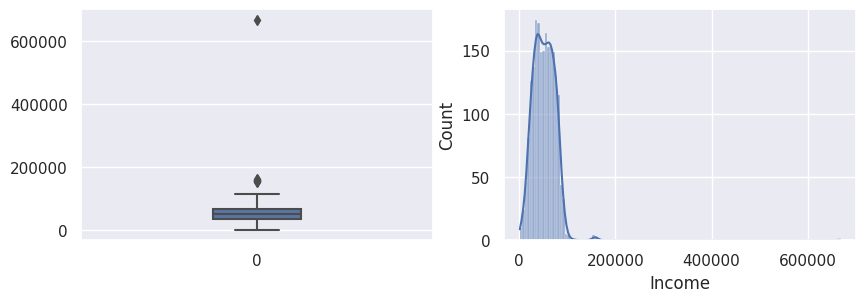

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Income"], width=0.25, ax=ax[0])
sns.histplot(df["Income"], kde=True, ax=ax[1])
plt.show()

In [ ]:
# todo: texte pour commenter

In [ ]:
df["Income"][df["Income"] > 200_000]

ID
9432    666666.0
Name: Income, dtype: float64

Pour nous, il s'agit d'une valeur aberrante à supprimer du jeu de données car "666 666" ne semble pas être une valeur réelle (6 fois le nombre 6...).

In [ ]:
df.drop(index=df[df["Income"] > 200_000].index, inplace=True)

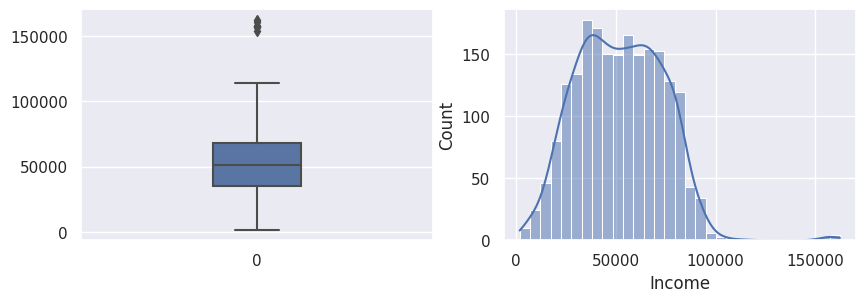

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Income"], width=0.25, ax=ax[0])
sns.histplot(df["Income"], kde=True, ax=ax[1])
plt.show()

In [ ]:
# todo: est-ce qu'on retire les valeurs au-dessus de 120 000 ? comment on le justifie ?
# => ce serait plutôt des individus ATYPIQUES, à enlever mais garder de côté pour l'analyse a posteriori

In [ ]:
df.drop(index=df[df["Income"] > 120_000].index, inplace=True)

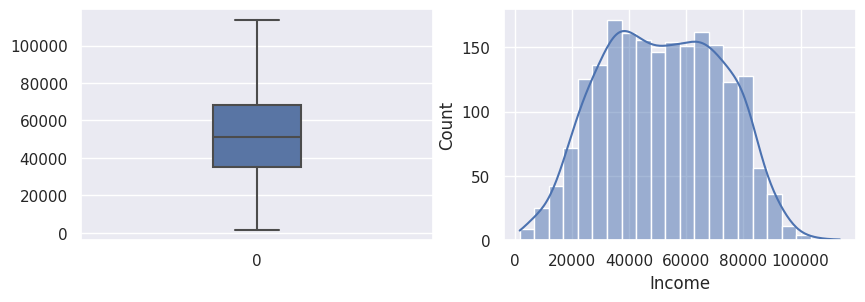

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Income"], width=0.25, ax=ax[0])
sns.histplot(df["Income"], kde=True, ax=ax[1])
plt.show()

### Year Date

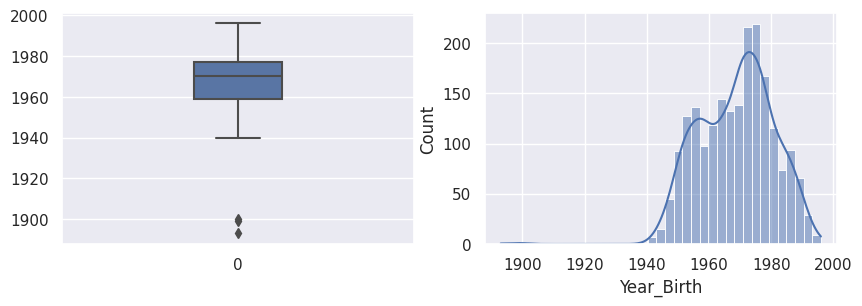

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Year_Birth"], width=0.25, ax=ax[0])
sns.histplot(df["Year_Birth"], kde=True, ax=ax[1])
plt.show()

In [ ]:
df[df["Year_Birth"] < 1920]

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                       
7829         1900  2n Cycle       Divorced  36640.0        1         0   
11004        1893  2n Cycle         Single  60182.0        0         1   
1150         1899       PhD       Together  83532.0        0         0   

      Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
ID                                               ...                        
7829   26-09-2013       99        15          6  ...                    1   
11004  17-05-2014       23         8          0  ...                    0   
1150   26-09-2013       36       755        144  ...                    6   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
ID                                                                        
7829                   2                  5             0             0   
11004                  2                  4             0             0   
1150                   4                  1             0             0   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
ID                                                                   
7829              0             0             0         1         0  
11004             0             0             0         0         0  
1150              1             0             0         0         0  

[3 rows x 26 columns]

Comme les personnes les plus âgées au monde ont très rarement plus de 100 ans, et que nous sommes en 2023, on peut sans problème estimer que les trois dates de naissance avant 1920 sont erronées.

Pour les deux années 1893 et 1899, on peut s'imaginer que les personnes ont fait une faute de frappe, et voulaient écrire, respectivement, 1983 et 1989.

In [ ]:
df.loc[df["Year_Birth"] == 1893, "Year_Birth"] = 1983
df.loc[df["Year_Birth"] == 1899, "Year_Birth"] = 1989

Pour l'année 1900, il est difficile d'imaginer une faute de frappe, il s'agit peut-être de la valeur par défaut.
On peut tout simplement supprimer la ligne correspondante.

In [ ]:
df.drop(index=df.loc[df["Year_Birth"] == 1900, "Year_Birth"].index, inplace=True)

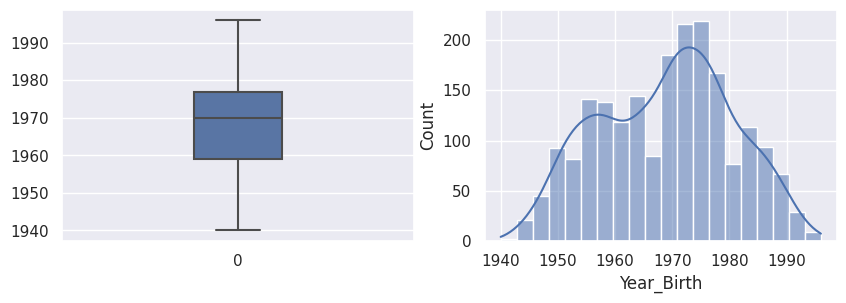

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Year_Birth"], width=0.25, ax=ax[0])
sns.histplot(df["Year_Birth"], kde=True, ax=ax[1])
plt.show()

## Valeurs manquantes

In [ ]:
# todo : faire un graphique pour visualiser la présence de valeurs manquantes

In [ ]:
# todo : explications etc

In [ ]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [ ]:
df["Income"][df["Income"].isna()]

ID
1994    NaN
5255    NaN
7281    NaN
7244    NaN
8557    NaN
10629   NaN
8996    NaN
9235    NaN
5798    NaN
8268    NaN
1295    NaN
2437    NaN
2863    NaN
10475   NaN
2902    NaN
4345    NaN
3769    NaN
7187    NaN
1612    NaN
5079    NaN
10339   NaN
3117    NaN
5250    NaN
8720    NaN
Name: Income, dtype: float64

In [ ]:
# TODO: supprimer valeurs manquantes OU remplacer par la moyenne ?

In [ ]:
# todo: expliquer POURQUOI ces données sont manquantes (notre hypothèse du moins), et expliquer notre démarche en conséquence

### Remplacement par la moyenne

In [ ]:
df["Income"][df["Income"].isna()]

ID
1994    NaN
5255    NaN
7281    NaN
7244    NaN
8557    NaN
10629   NaN
8996    NaN
9235    NaN
5798    NaN
8268    NaN
1295    NaN
2437    NaN
2863    NaN
10475   NaN
2902    NaN
4345    NaN
3769    NaN
7187    NaN
1612    NaN
5079    NaN
10339   NaN
3117    NaN
5250    NaN
8720    NaN
Name: Income, dtype: float64

In [ ]:
df["Income"].fillna(df["Income"].mean(), inplace=True)

In [ ]:
# Vérification du bon remplacement des valeurs manquantes
df["Income"].isna().sum()

0

# Création de variables

In [ ]:
# todo: commenter la démarche

In [ ]:
df["NbAcceptedCampaigns"] = 0

for i in range(1, 6):
    df["NbAcceptedCampaigns"] += df[f"AcceptedCmp{i}"]

<Axes: xlabel='NbAcceptedCampaigns', ylabel='Count'>

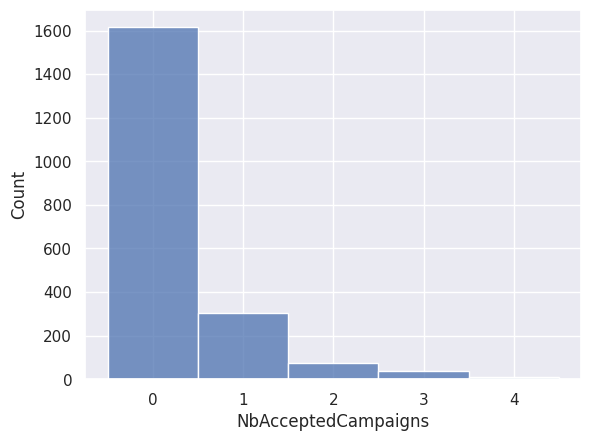

In [ ]:
sns.histplot(df["NbAcceptedCampaigns"], discrete=True)

In [ ]:
df["HasAcceptedCampaigns"] = df["NbAcceptedCampaigns"] > 0

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Axes: xlabel='HasAcceptedCampaigns', ylabel='Count'>

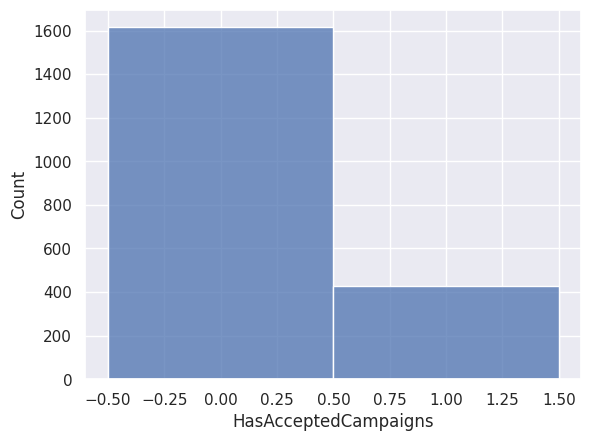

In [ ]:
sns.histplot(df["HasAcceptedCampaigns"], discrete=True)

In [ ]:
df_clients = df[df["NbAcceptedCampaigns"] > 0]
df_not_clients = df[df["NbAcceptedCampaigns"] == 0]

In [ ]:
# todo: créer une variable qui additionne le nombre d'enfants Kids et Teen (mais avant cela, vérifier si par exemple Kids et Teen apportent des informations différentes => si les deux sont complémentaires, on les laisse / sinon on les supprime au profit de notre nouvelle variable)

<Axes: xlabel='Kidhome', ylabel='Teenhome'>

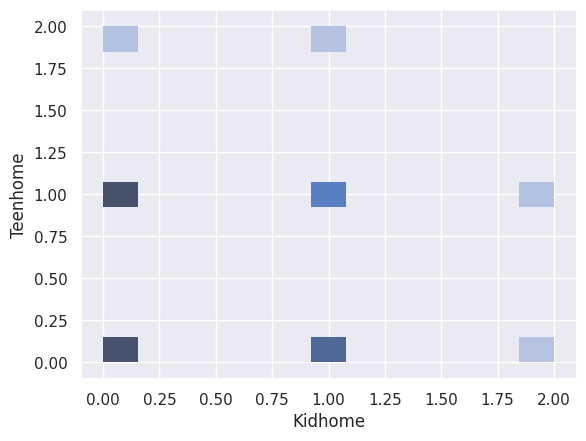

In [ ]:
sns.histplot(df, x="Kidhome", y="Teenhome")

In [ ]:
df.value_counts(["Kidhome", "Teenhome"])

Kidhome  Teenhome
0        1           576
         0           571
1        0           463
         1           342
0        2            28
2        1            26
1        2            22
2        0            17
dtype: int64

In [ ]:
df.value_counts(["Kidhome", "Teenhome"]).reset_index(name="count")

Kidhome  Teenhome  count
0        0         1    576
1        0         0    571
2        1         0    463
3        1         1    342
4        0         2     28
5        2         1     26
6        1         2     22
7        2         0     17

In [ ]:
df["NbChildren"] = df["Kidhome"] + df["Teenhome"]

<Axes: xlabel='NbChildren', ylabel='Count'>

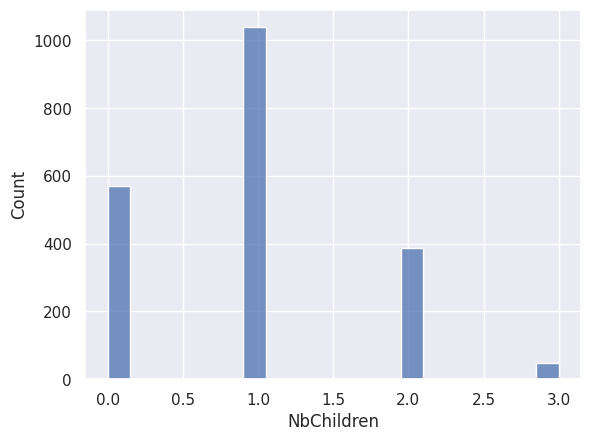

In [ ]:
sns.histplot(df["NbChildren"])

In [ ]:
# todo: créer une variable "NbAcceptedCampaignsWithResponse", qui contient donc la 6ème campagne marketing => l'objectif est de clusteriser les gens en fonction de "à quel point ils sont marketables" => c'est-à-dire, on présente nos résultats en disant sur qui il vaut mieux se concentrer pour faire des pubs

In [ ]:
# todo: créer une variable "RevenuePerClient" => le revenu rapporté par chaque client => ce serait plutôt juste une variable type "KPI" à afficher dans un dashboard non ?

In [ ]:
# todo: de même, créer une variable "RevenueWinePerClient" => le revenu de vin pour chaque client, et faire de même pour chaque produit => par la suite on pourra faire des représentations "quel client rapporte le plus de vin"

# Visualisation

In [ ]:
# todo: renommer cette partie ? / mettre un texte introductif pour expliquer la démarche ("Une fois les données nettoyées, on les explore de nouveau, plus en profondeur")

In [ ]:
# todo: organiser en plusieurs sous-parties

In [ ]:
# todo: choisir les représentations les plus pertinentes à montrer ci-dessous

<Axes: xlabel='Income', ylabel='Density'>

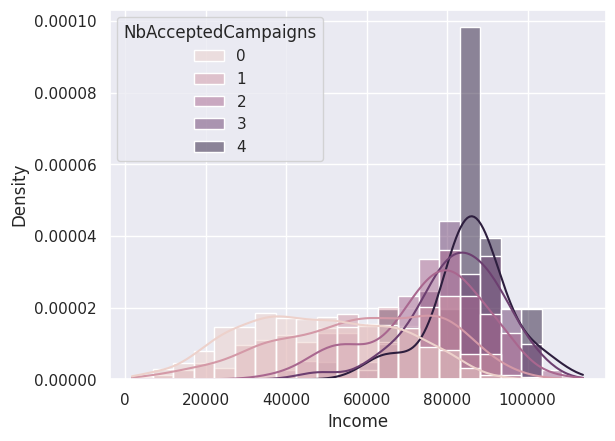

In [ ]:
sns.histplot(
    df,
    x="Income",
    hue="NbAcceptedCampaigns",
    kde=True,
    stat="density",
    common_norm=False,
)

<Axes: xlabel='Income', ylabel='Probability'>

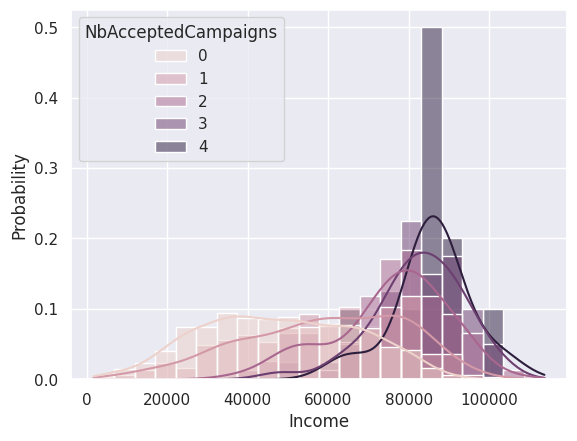

In [ ]:
sns.histplot(
    df,
    x="Income",
    hue="NbAcceptedCampaigns",
    kde=True,
    stat="probability",
    common_norm=False,
)

<seaborn.axisgrid.FacetGrid>

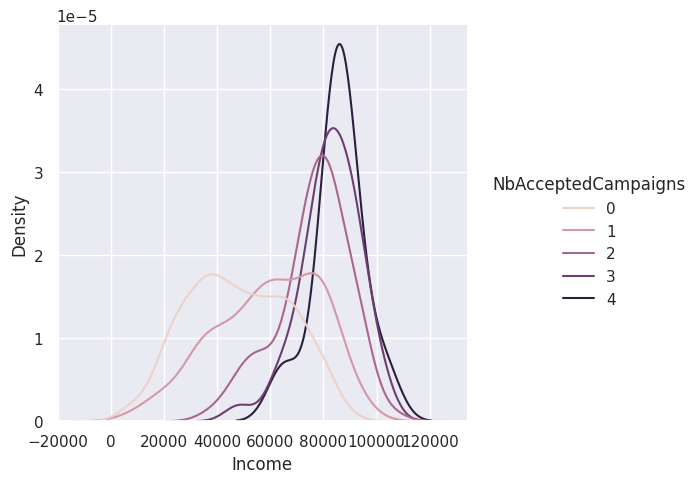

In [ ]:
sns.displot(df, x="Income", hue="NbAcceptedCampaigns", kind="kde", common_norm=False)

In [ ]:
# todo: faire la même chose en boxplots !

<Axes: xlabel='Income', ylabel='Count'>

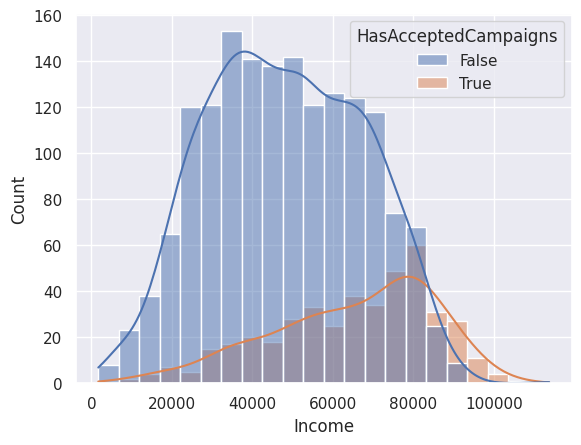

In [ ]:
sns.histplot(df, x="Income", hue="HasAcceptedCampaigns", kde=True)

<Axes: xlabel='Income', ylabel='Count'>

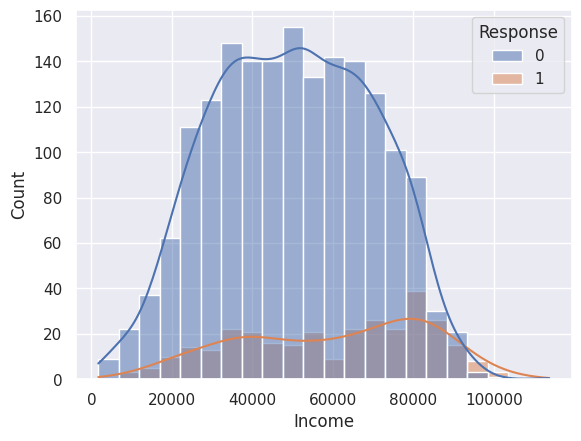

In [ ]:
sns.histplot(df, x="Income", hue="Response", kde=True)

<Axes: xlabel='Education', ylabel='Count'>

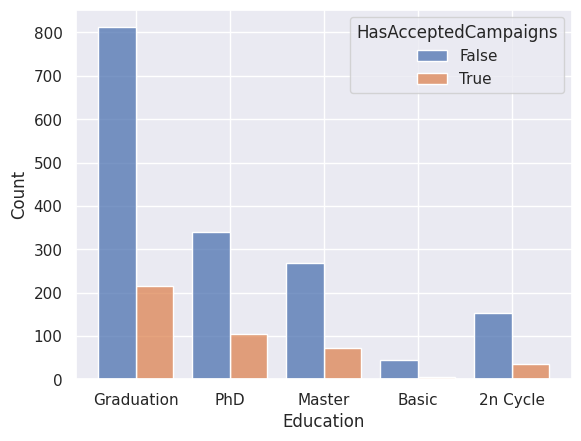

In [ ]:
sns.histplot(
    data=df, x="Education", hue="HasAcceptedCampaigns", multiple="dodge", shrink=0.8
)

<Axes: xlabel='NbChildren', ylabel='Count'>

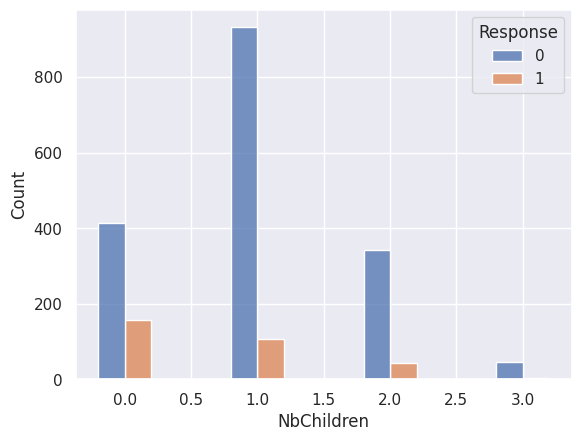

In [ ]:
sns.histplot(
    data=df,
    x="NbChildren",
    hue="Response",
    multiple="dodge",
    discrete=True,
    shrink=0.4,
)

<Axes: xlabel='NbChildren', ylabel='Count'>

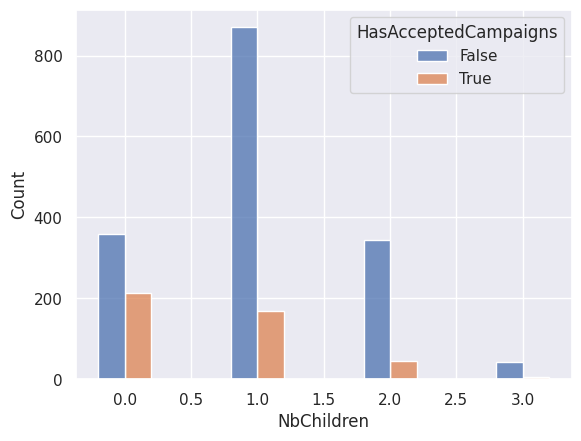

In [ ]:
sns.histplot(
    data=df,
    x="NbChildren",
    hue="HasAcceptedCampaigns",
    multiple="dodge",
    discrete=True,
    shrink=0.4,
)

/tmp/ipykernel_48415/2050374921.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[df.corr().abs() > 0.5],


<Axes: >

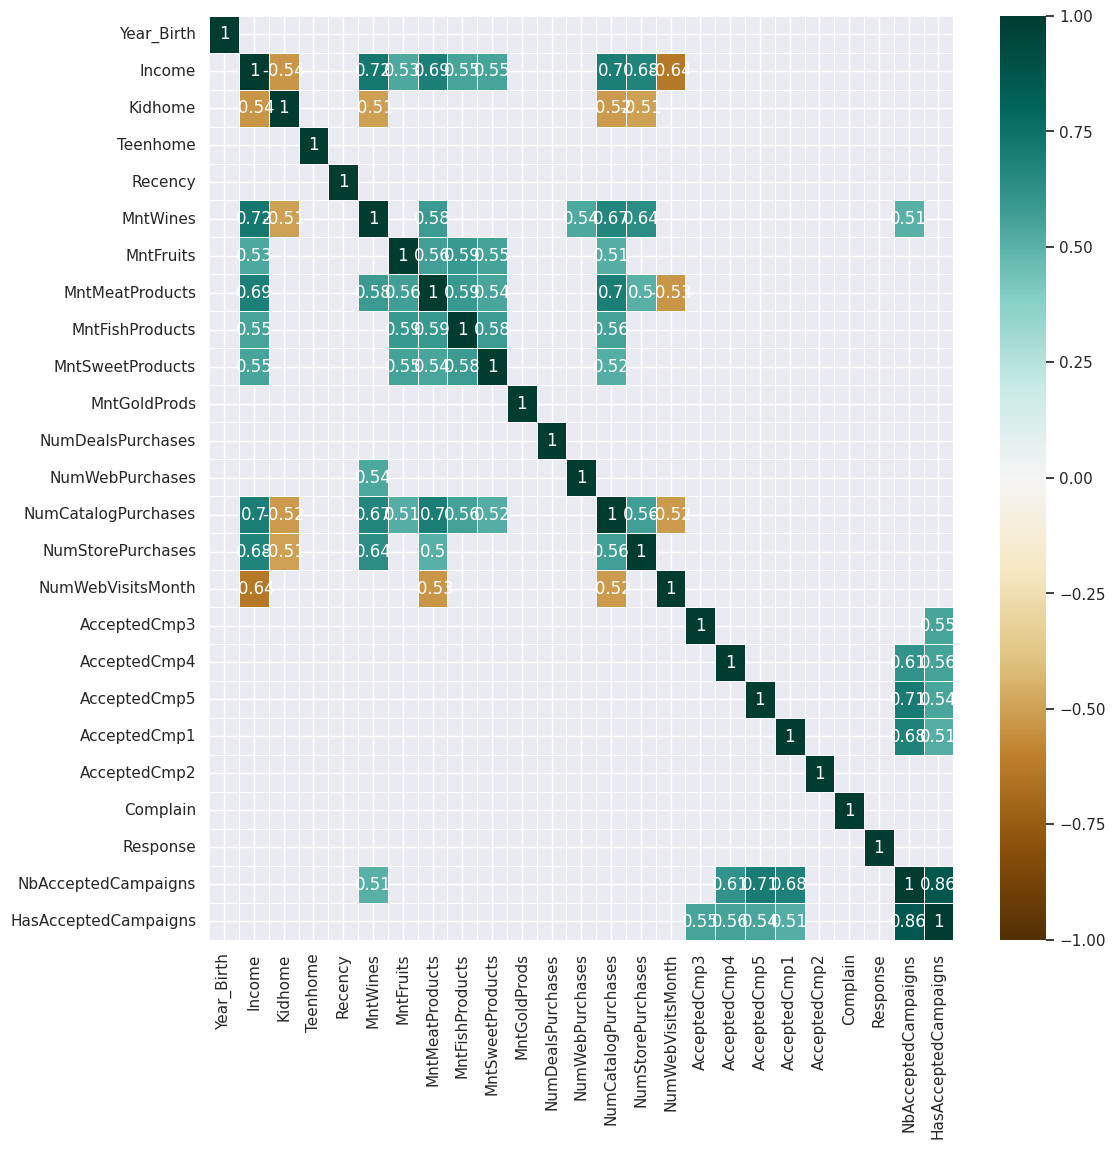

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(
    df.corr()[df.corr().abs() > 0.5],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

<Axes: xlabel='Income', ylabel='MntMeatProducts'>

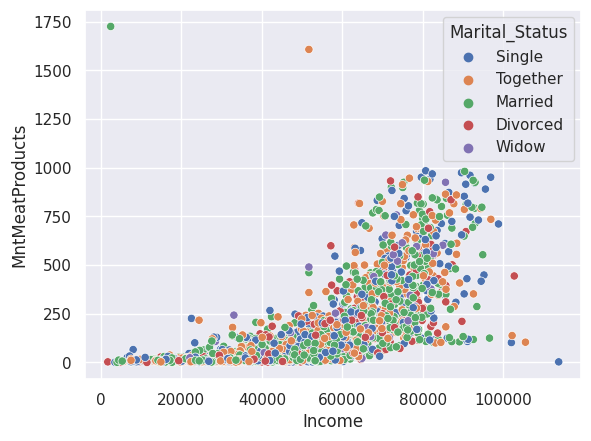

In [ ]:
sns.scatterplot(data=df, x="Income", y="MntMeatProducts", hue="Marital_Status")

<Axes: xlabel='Income', ylabel='MntWines'>

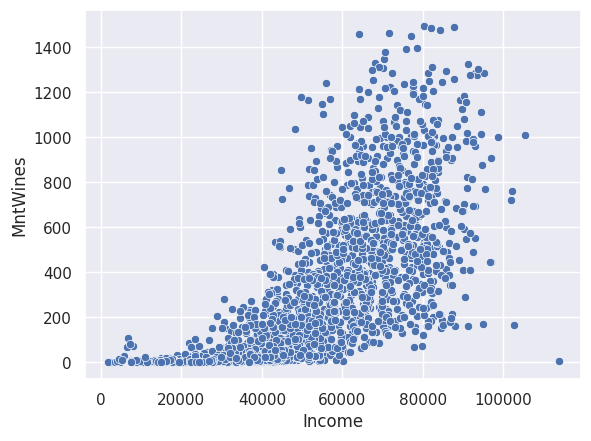

In [ ]:
sns.scatterplot(data=df, x="Income", y="MntWines")

<Axes: xlabel='Education', ylabel='Count'>

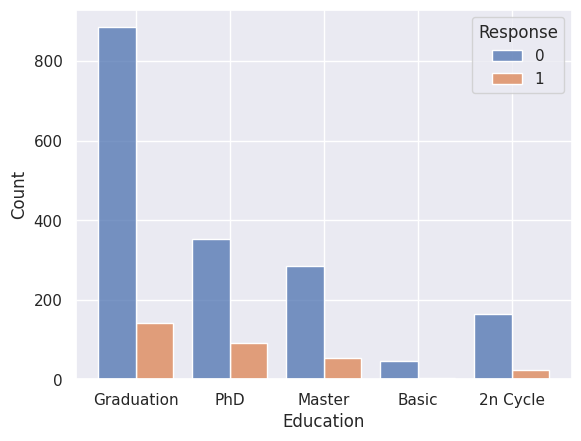

In [ ]:
sns.histplot(data=df, x="Education", hue="Response", multiple="dodge", shrink=0.8)

<Axes: xlabel='Education', ylabel='Count'>

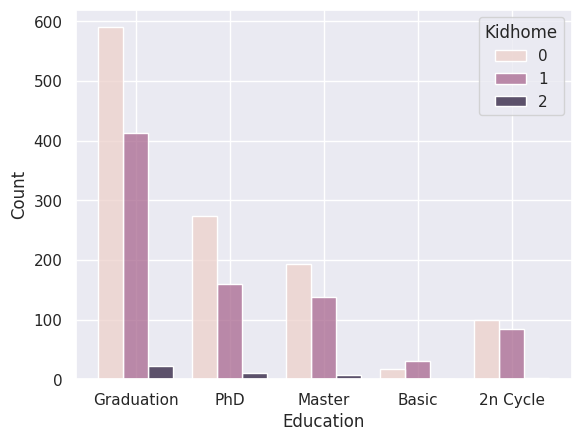

In [ ]:
sns.histplot(data=df, x="Education", hue="Kidhome", multiple="dodge", shrink=0.8)

<Axes: xlabel='Marital_Status', ylabel='Count'>

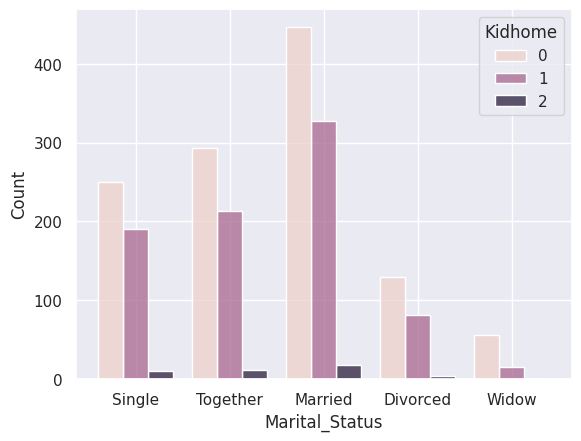

In [ ]:
sns.histplot(data=df, x="Marital_Status", hue="Kidhome", multiple="dodge", shrink=0.8)

<seaborn.axisgrid.FacetGrid>

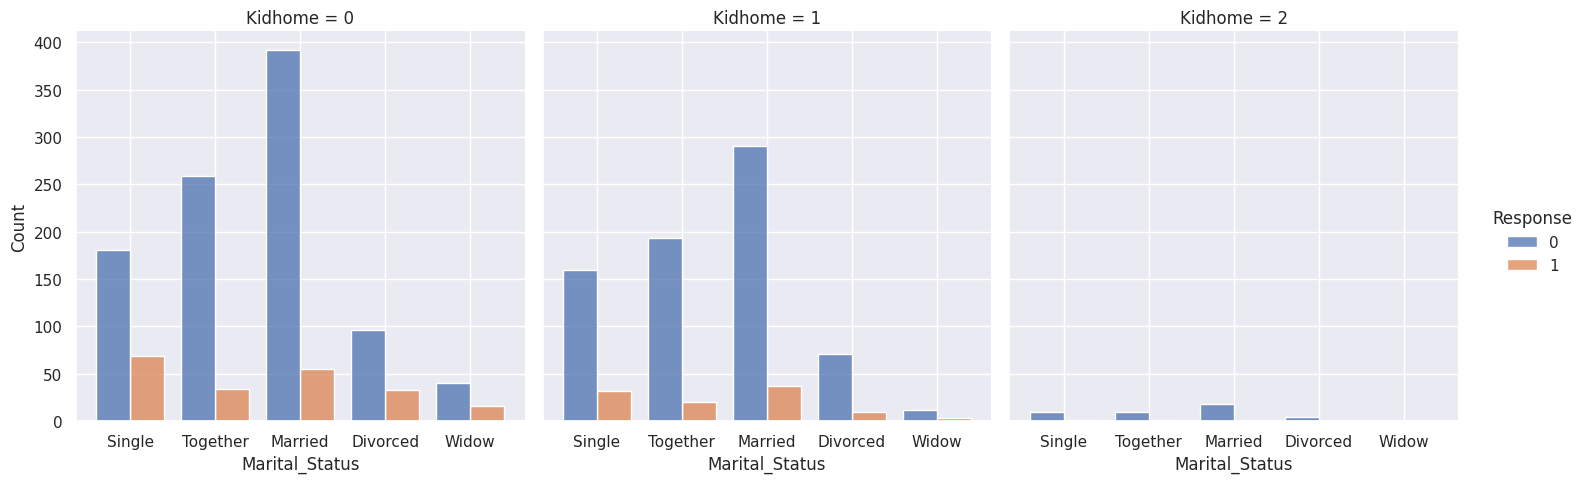

In [ ]:
sns.displot(
    data=df,
    x="Marital_Status",
    hue="Response",
    col="Kidhome",
    multiple="dodge",
    shrink=0.8,
)

# Transformation des données

In [ ]:
df_transforme = df.copy()

## Mise à l'échelle (réduction ?)

### Explication

In [ ]:
# todo: expliquer pourquoi on a envie de le faire

### Sélection des variables

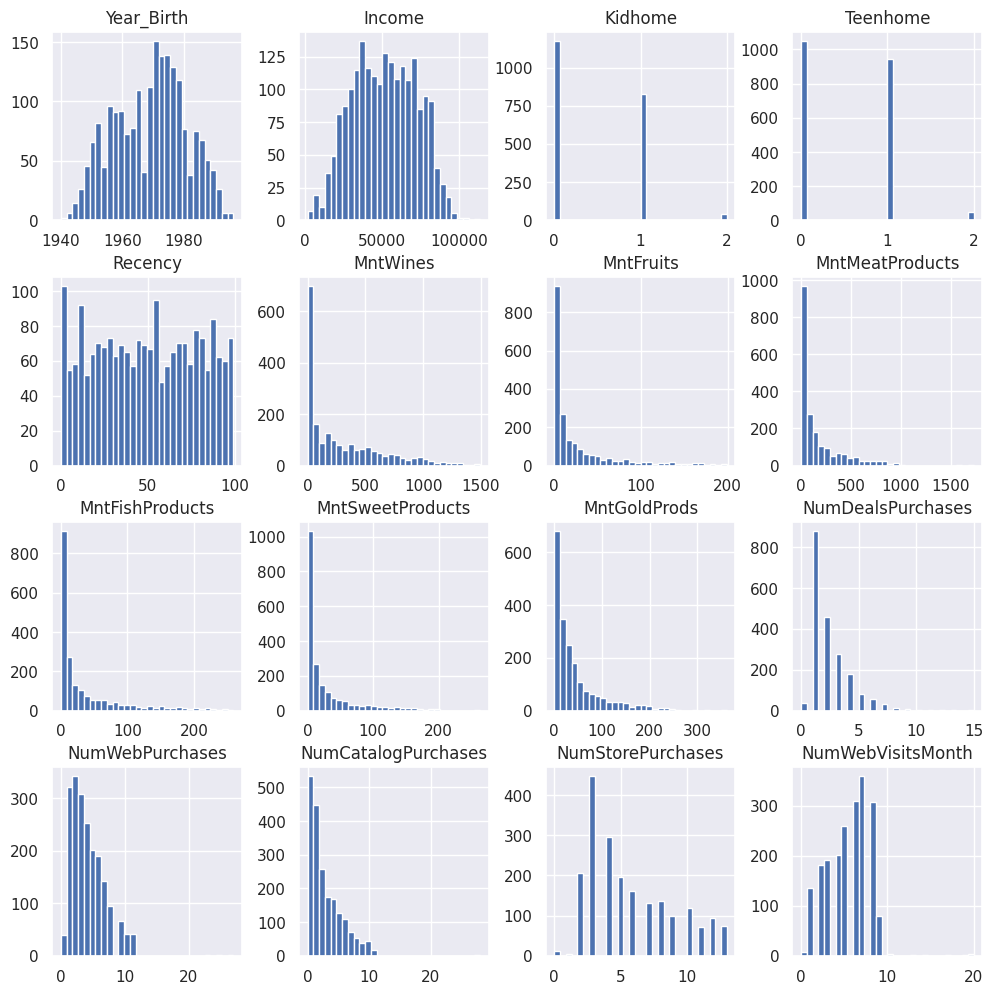

In [ ]:
df[var_numeriques].hist(figsize=(12, 12), bins=30)
plt.show()

In [ ]:
# todo(prof): est-ce que notre choix de variables est bon ?
var_a_scaler = [
    "Year_Birth",
    "Income",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
]

<Axes: >

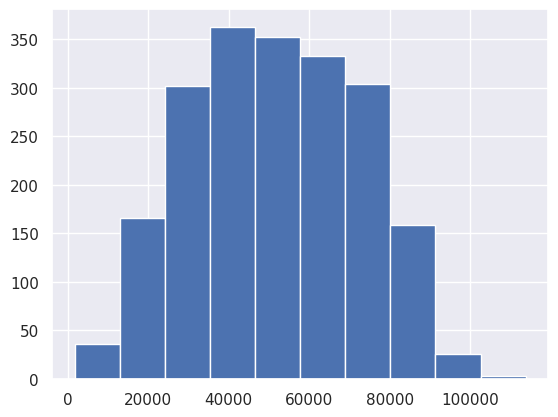

In [ ]:
df["Income"].hist()

<Axes: >

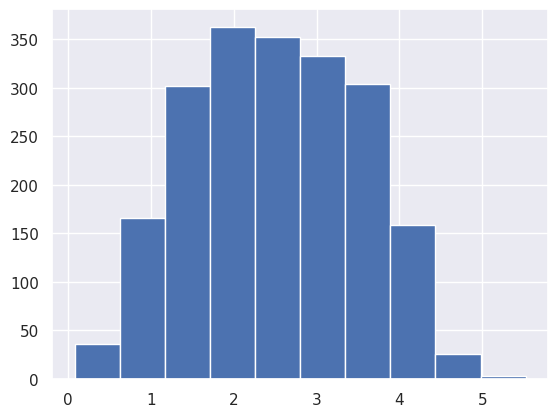

In [ ]:
(df["Income"] / df["Income"].std()).hist()

### Transformation

In [ ]:
for var in var_a_scaler:
    df_transforme[var] = df[var] / df[var].std()
    df_transforme[var] -= df_transforme[var].min()

### Conclusion

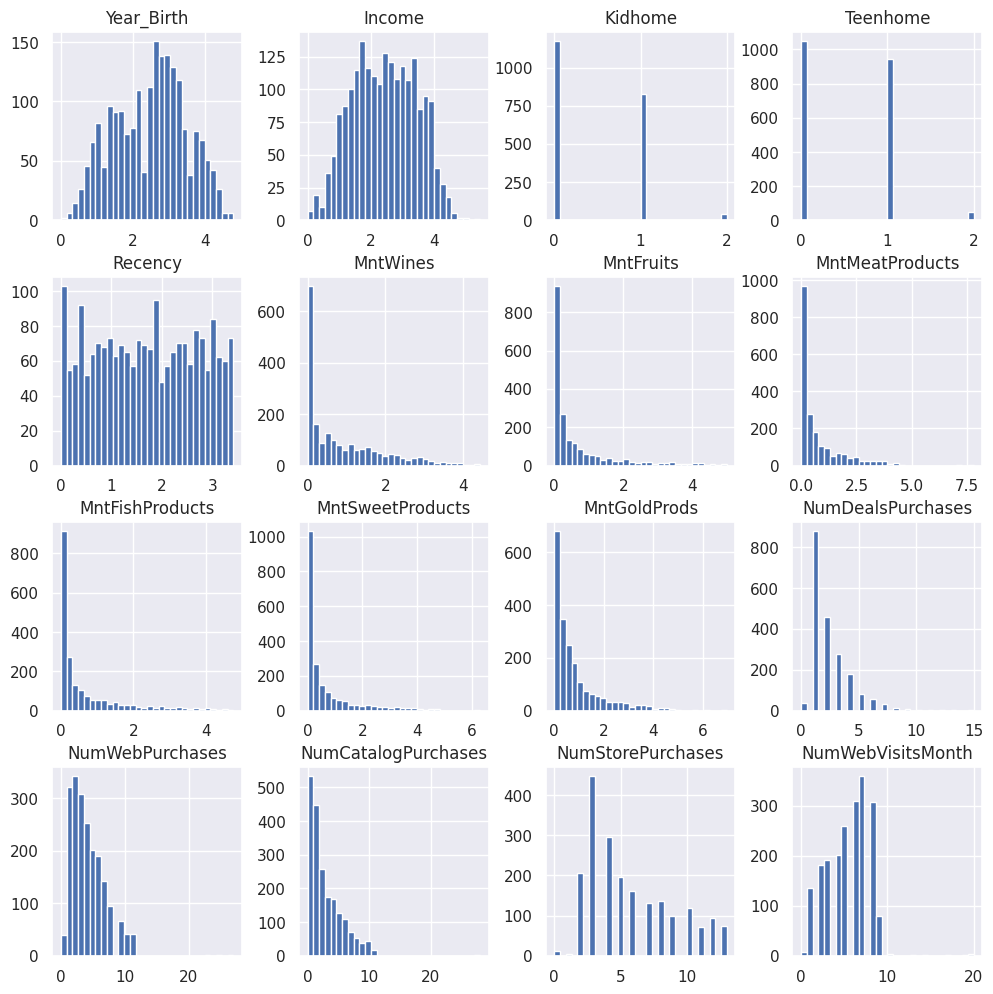

In [ ]:
df_transforme[var_numeriques].hist(figsize=(12, 12), bins=30)
plt.show()

Les changements sur la matrice de corrélation sont de l'ordre de $10^{-15}$, donc extrêmement négligeables.

<Axes: >

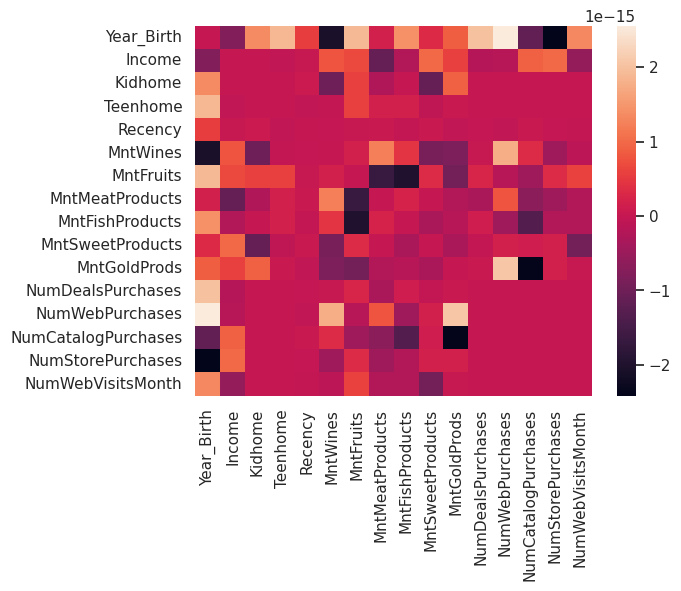

In [ ]:
sns.heatmap(df_transforme[var_numeriques].corr() - df[var_numeriques].corr())

## Normalisation

### Explication

Pour normaliser les données, nous allons utiliser la transformation de Box-Cox, définie $\forall x > 0, $ comme ci-dessous :
$B(x, \lambda) = \begin{cases} \frac{x^{\lambda} - 1}{\lambda} & \text{  si } \lambda \neq 0 \\ \log(x) & \text{  si } \lambda = 0 \end{cases}$

Cette transformation est à appliquer à une variable (strictement positive), en ajustant le $\lambda$ pour maximiser la normalité.

Nous allons utiliser la librairie `scipy.stats.boxcox` qui estime le meilleur paramètre $\lambda$.

### Sélection des variables

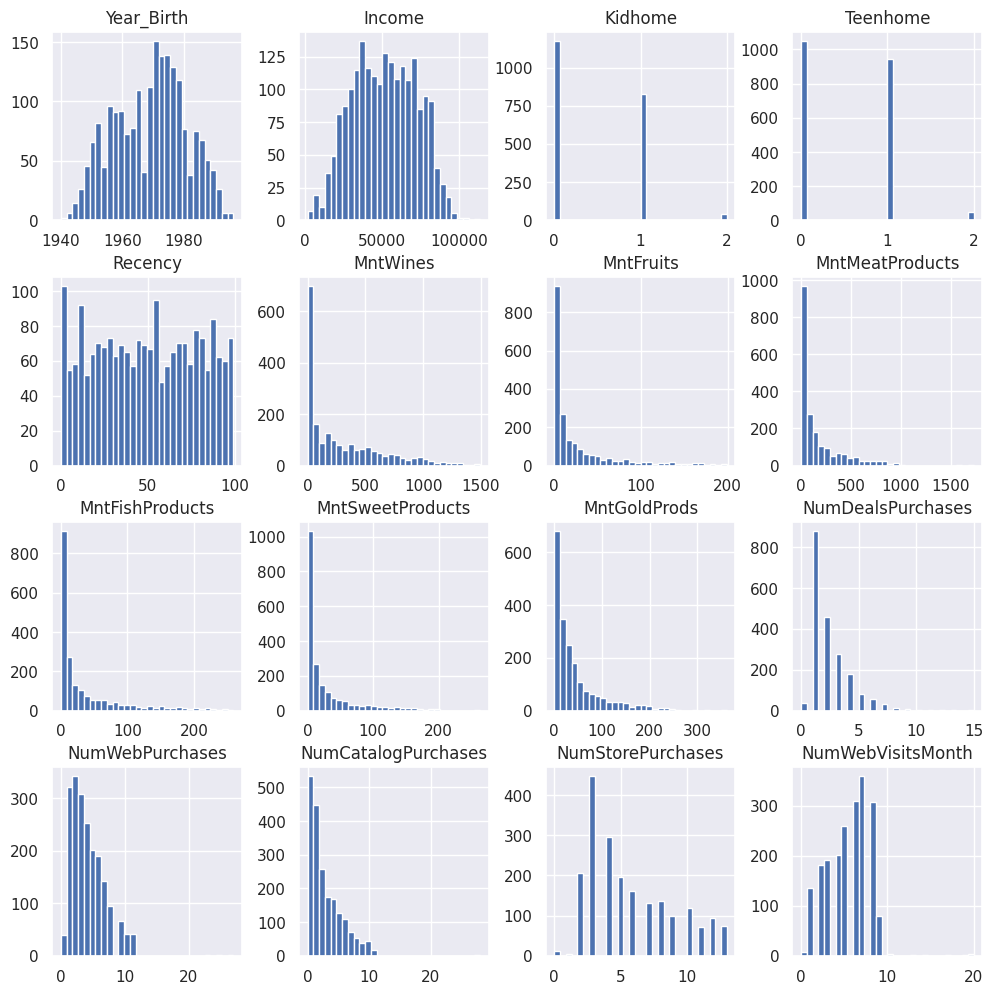

In [ ]:
df[var_numeriques].hist(figsize=(12, 12), bins=30)
plt.show()

In [ ]:
# todo(prof): faut-il inclure la distribution uniforme Recency ?
# todo(prof): est-ce que notre choix de variables est bon ?
var_a_normaliser = [
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
]

### Transformation

<Axes: xlabel='MntWines', ylabel='Count'>

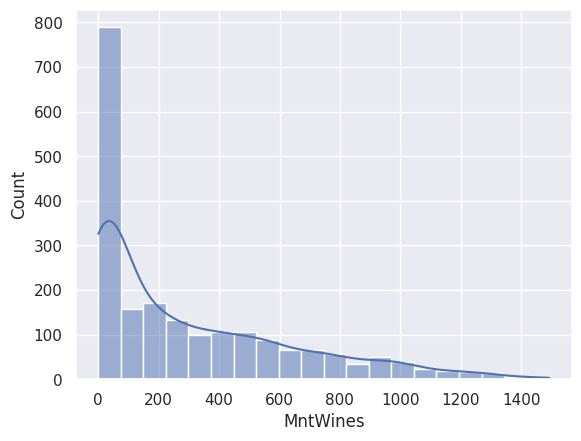

In [ ]:
sns.histplot(df["MntWines"], kde=True)

In [ ]:
from scipy.stats import boxcox

In [ ]:
boxcox_lambdas = {}  # on garde les lambdas, pour la transformation inverse

In [ ]:
for var in var_a_normaliser:
    print(f"{var = }")
    var_strict_positif = df[var] + df[var].min() + 1

    var_apres_boxcox, l = boxcox(var_strict_positif)

    df_transforme[var] = var_apres_boxcox
    boxcox_lambdas[var] = l

var = 'MntWines'
var = 'MntFruits'
var = 'MntMeatProducts'
var = 'MntFishProducts'
var = 'MntSweetProducts'
var = 'MntGoldProds'


In [ ]:
# Tuto : comment récupérer la fonction initiale
# (il faut avoir récupéré le paramètre "l" lambda)

# from scipy.special import inv_boxcox
# initial = inv_boxcox(incbox, l)
# initial = pd.DataFrame(initial)
# sns.histplot(initial, bins=50, kde=True)

<Axes: xlabel='MntWines', ylabel='Count'>

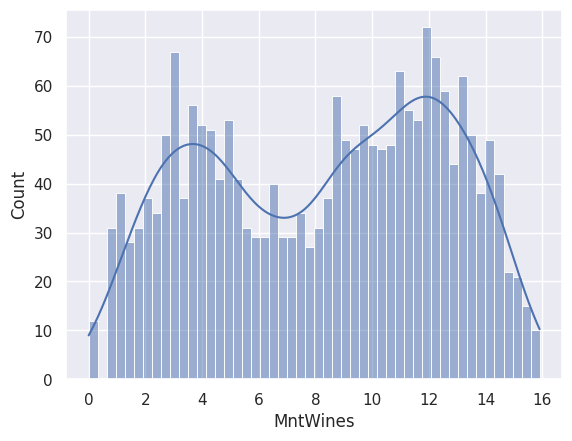

In [ ]:
sns.histplot(df_transforme["MntWines"], bins=50, kde=True)

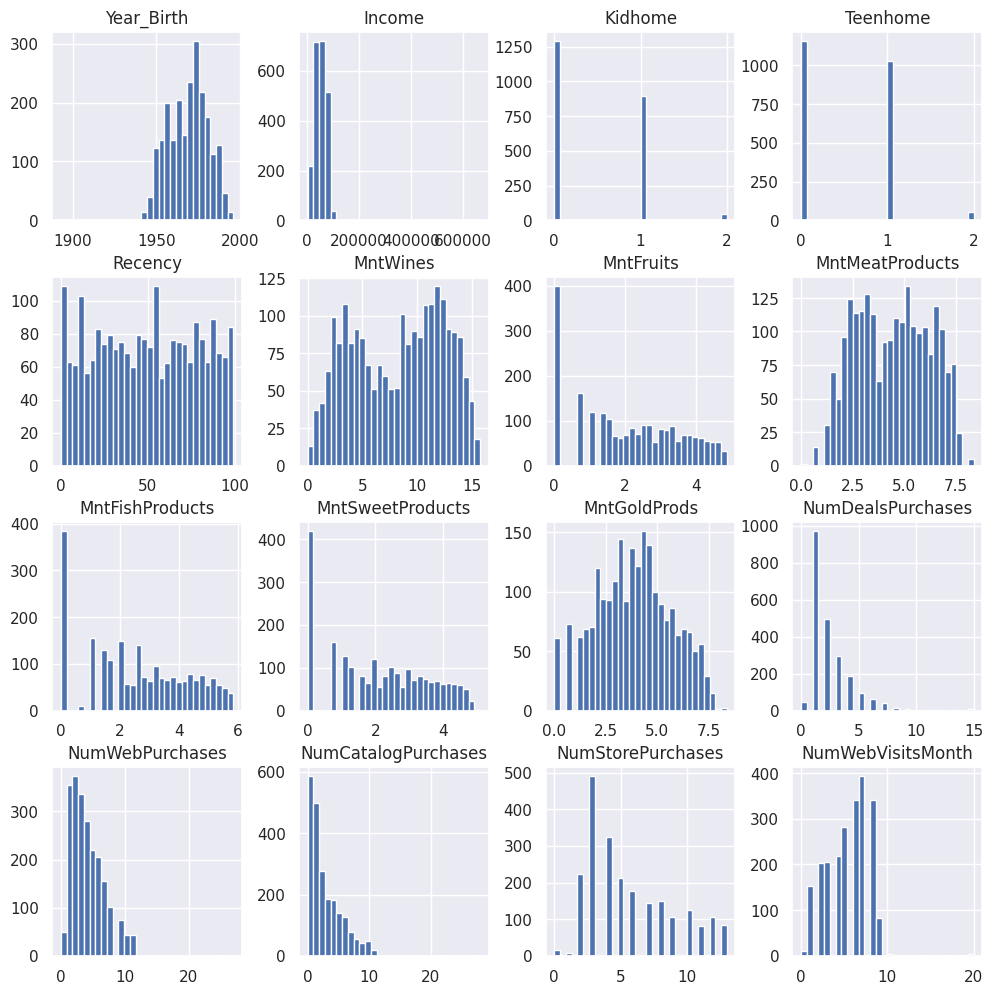

In [ ]:
df_transforme[var_numeriques].hist(figsize=(12, 12), bins=30)
plt.show()

### Conclusion

In [ ]:
# todo: analyser les résultats, notamment l'impact sur la matrice de corrélation (du coup, mettre ci-dessous la matrice de corrélation pré-transformation et comparer)

<Axes: >

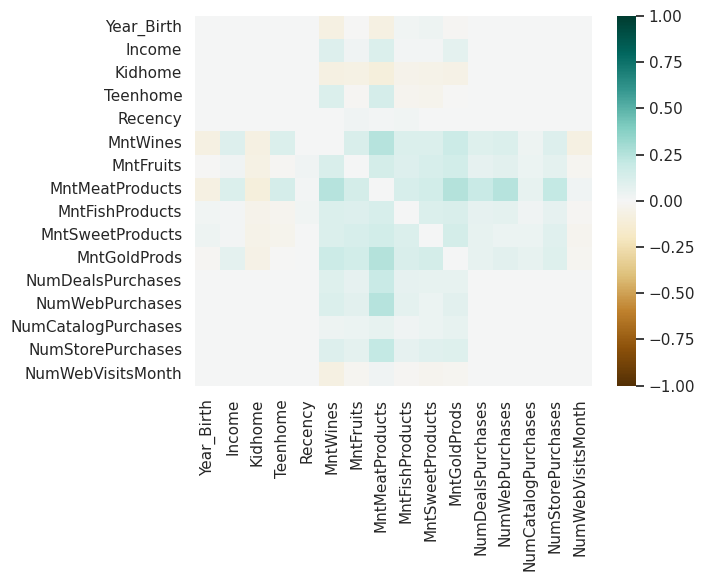

In [ ]:
sns.heatmap(
    df_transforme[var_numeriques].corr() - df[var_numeriques].corr(),
    cmap="BrBG",
    vmin=-1,
    vmax=1,
)

In [ ]:
df_transforme[var_numeriques].corr() - df[var_numeriques].corr()

Year_Birth    Income   Kidhome  Teenhome   Recency  \
Year_Birth             0.000000  0.000000  0.000000  0.000000  0.000000   
Income                 0.000000  0.000000  0.000000  0.000000  0.000000   
Kidhome                0.000000  0.000000  0.000000  0.000000  0.000000   
Teenhome               0.000000  0.000000  0.000000  0.000000  0.000000   
Recency                0.000000  0.000000  0.000000  0.000000  0.000000   
MntWines              -0.074698  0.108392 -0.076819  0.116755  0.003093   
MntFruits             -0.003219  0.030859 -0.064438 -0.015240  0.029431   
MntMeatProducts       -0.072827  0.114629 -0.095674  0.140137  0.011562   
MntFishProducts        0.020830  0.009608 -0.043724 -0.024120  0.016451   
MntSweetProducts       0.032304  0.012272 -0.054057 -0.036512  0.003660   
MntGoldProds          -0.009066  0.073523 -0.061899 -0.003120  0.004720   
NumDealsPurchases      0.000000  0.000000  0.000000  0.000000  0.000000   
NumWebPurchases        0.000000  0.000000  0.000000  0.000000  0.000000   
NumCatalogPurchases    0.000000  0.000000  0.000000  0.000000  0.000000   
NumStorePurchases      0.000000  0.000000  0.000000  0.000000  0.000000   
NumWebVisitsMonth      0.000000  0.000000  0.000000  0.000000  0.000000   

                     MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Year_Birth          -0.074698  -0.003219        -0.072827         0.020830   
Income               0.108392   0.030859         0.114629         0.009608   
Kidhome             -0.076819  -0.064438        -0.095674        -0.043724   
Teenhome             0.116755  -0.015240         0.140137        -0.024120   
Recency              0.003093   0.029431         0.011562         0.016451   
MntWines             0.000000   0.123121         0.249256         0.115089   
MntFruits            0.123121   0.000000         0.143620         0.103626   
MntMeatProducts      0.249256   0.143620         0.000000         0.126062   
MntFishProducts      0.115089   0.103626         0.126062         0.000000   
MntSweetProducts     0.117157   0.127451         0.151080         0.112125   
MntGoldProds         0.178009   0.154503         0.252524         0.122423   
NumDealsPurchases    0.100588   0.064416         0.191481         0.068902   
NumWebPurchases      0.114578   0.084931         0.246149         0.077189   
NumCatalogPurchases  0.038455   0.044845         0.058533         0.024266   
NumStorePurchases    0.105515   0.075335         0.207125         0.067400   
NumWebVisitsMonth   -0.075004  -0.018860         0.030879        -0.013253   

                     MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Year_Birth                   0.032304     -0.009066           0.000000   
Income                       0.012272      0.073523           0.000000   
Kidhome                     -0.054057     -0.061899           0.000000   
Teenhome                    -0.036512     -0.003120           0.000000   
Recency                      0.003660      0.004720           0.000000   
MntWines                     0.117157      0.178009           0.100588   
MntFruits                    0.127451      0.154503           0.064416   
MntMeatProducts              0.151080      0.252524           0.191481   
MntFishProducts              0.112125      0.122423           0.068902   
MntSweetProducts             0.000000      0.147159           0.061258   
MntGoldProds                 0.147159      0.000000           0.058671   
NumDealsPurchases            0.061258      0.058671           0.000000   
NumWebPurchases              0.039283      0.078229           0.000000   
NumCatalogPurchases          0.043287      0.059180           0.000000   
NumStorePurchases            0.093222      0.096160           0.000000   
NumWebVisitsMonth           -0.024093     -0.017537           0.000000   

                     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Year_Birth                  0.000000             0.000000           0.000000   

<Axes: >

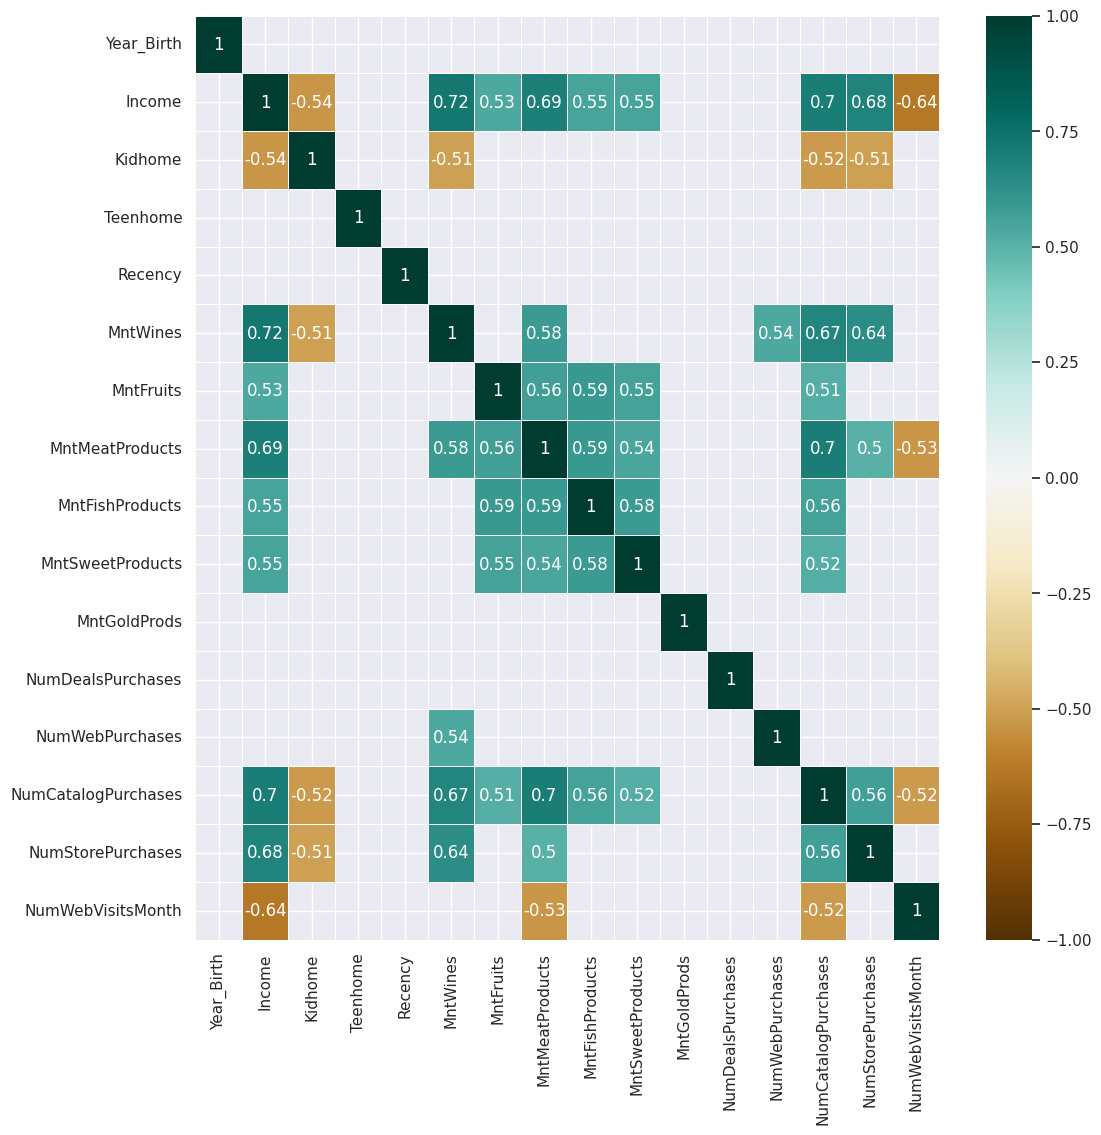

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(
    df[var_numeriques].corr()[df[var_numeriques].corr().abs() > 0.5],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

<Axes: >

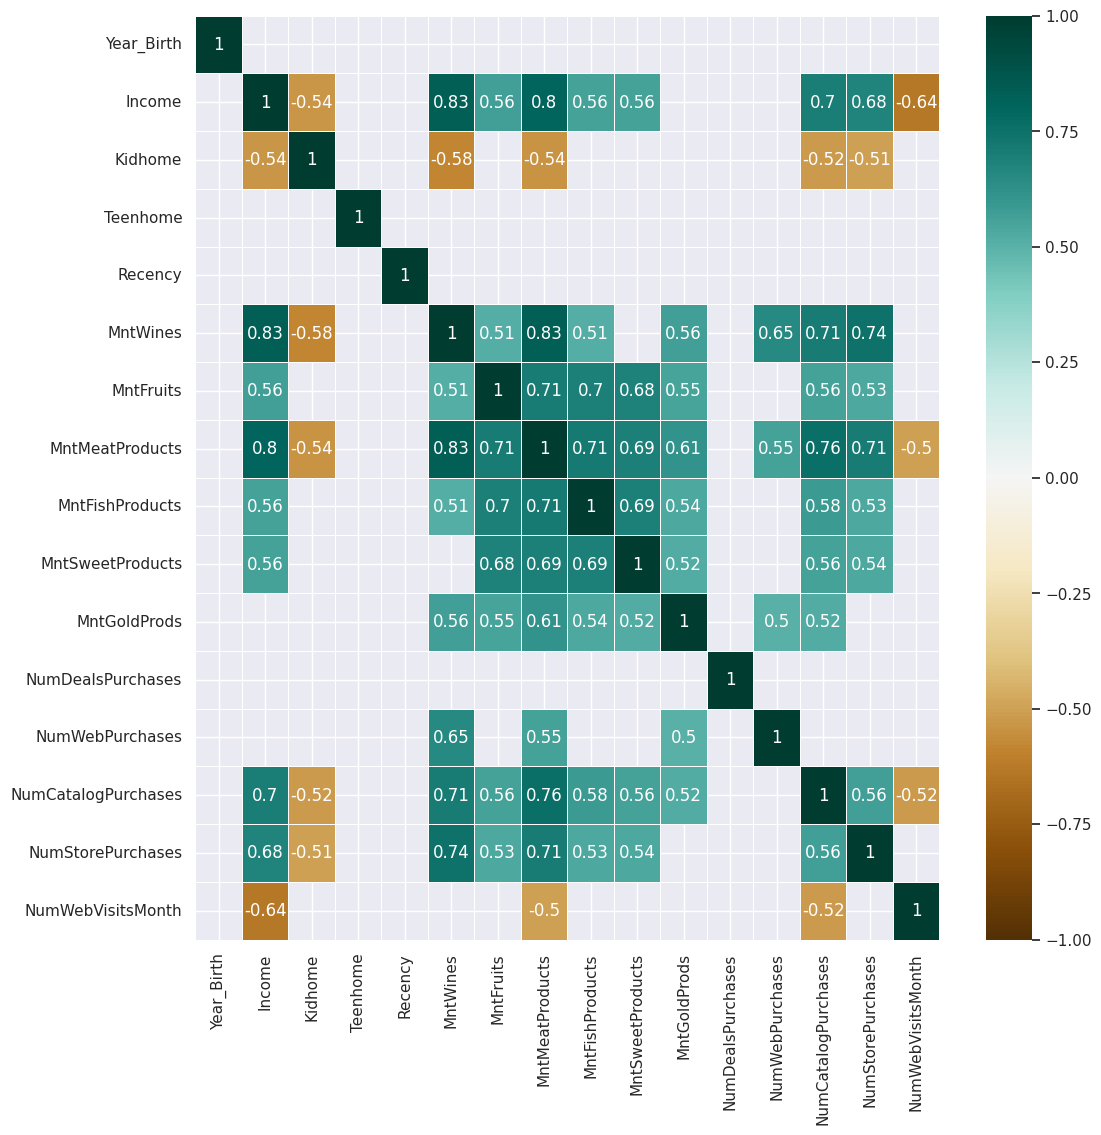

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(
    df_transforme[var_numeriques].corr()[
        df_transforme[var_numeriques].corr().abs() > 0.5
    ],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

## Variables catégoriques

### Encodage

In [ ]:
# todo: One Hot Encoding, Target Encoding, etc

# Analyse multi-variée

## Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k3 = KMeans(n_clusters=3)
k4 = KMeans(n_clusters=4)

In [ ]:
k3.fit(df[var_numeriques])
k4.fit(df[var_numeriques])

/home/ab2/.cache/pypoetry/virtualenvs/projet-transverse-WjIBhb55-py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ab2/.cache/pypoetry/virtualenvs/projet-transverse-WjIBhb55-py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
df["cluster"] = k3.labels_

<Axes: xlabel='cluster', ylabel='Count'>

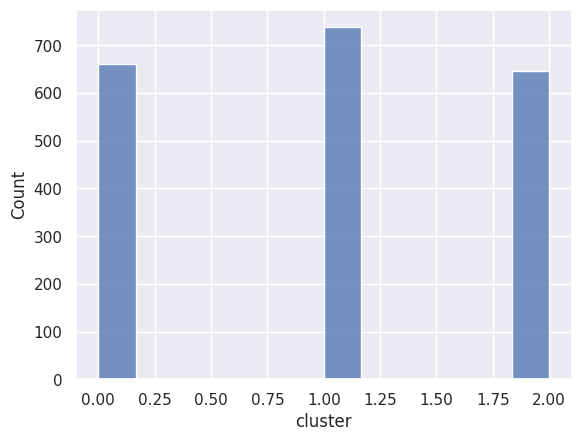

In [ ]:
sns.histplot(df["cluster"])

<Axes: xlabel='Income', ylabel='Count'>

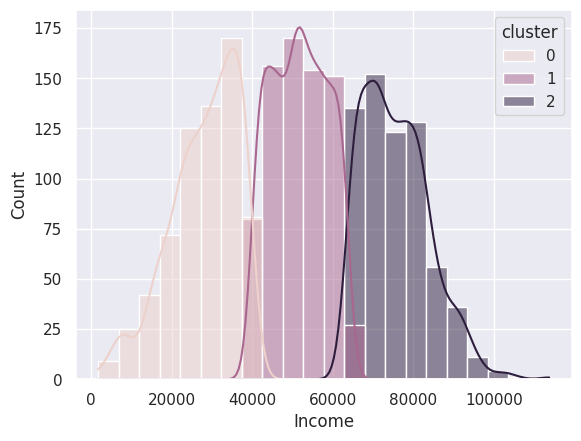

In [ ]:
sns.histplot(df, x="Income", hue="cluster", kde=True)

<Axes: xlabel='cluster', ylabel='Count'>

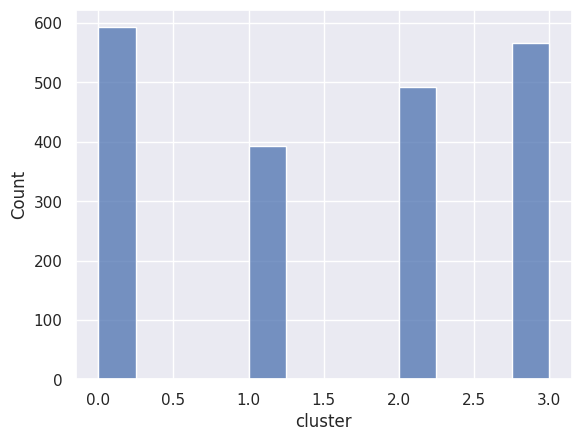

In [ ]:
df["cluster"] = k4.labels_
sns.histplot(df["cluster"])

<Axes: xlabel='Income', ylabel='Count'>

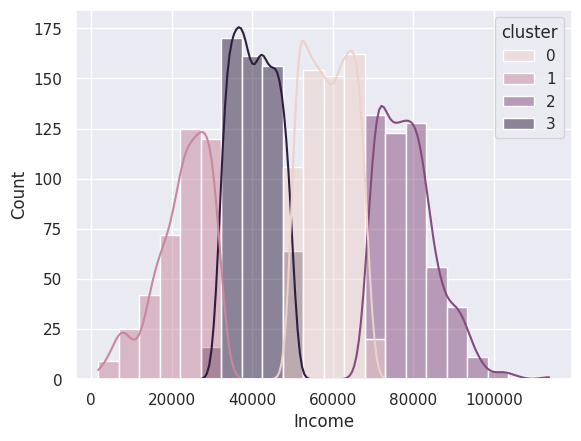

In [ ]:
sns.histplot(df, x="Income", hue="cluster", kde=True)

## Analyse en Composantes Principales (ACP)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# todo: centrer / réduire

In [ ]:
acp = PCA()

In [ ]:
acp.fit(df[var_numeriques])

PCA()

In [ ]:
a = pd.Series(acp.explained_variance_ratio_, index=df[var_numeriques].columns)

In [ ]:
print(a)

Year_Birth             9.997931e-01
Income                 1.312278e-04
Kidhome                5.900361e-05
Teenhome               6.723344e-06
Recency                3.806676e-06
MntWines               2.146473e-06
MntFruits              1.983752e-06
MntMeatProducts        1.699594e-06
MntFishProducts        2.962368e-07
MntSweetProducts       1.568893e-08
MntGoldProds           1.132983e-08
NumDealsPurchases      6.779114e-09
NumWebPurchases        6.750722e-09
NumCatalogPurchases    4.103894e-09
NumStorePurchases      4.680169e-10
NumWebVisitsMonth      3.188469e-10
dtype: float64


<Axes: >

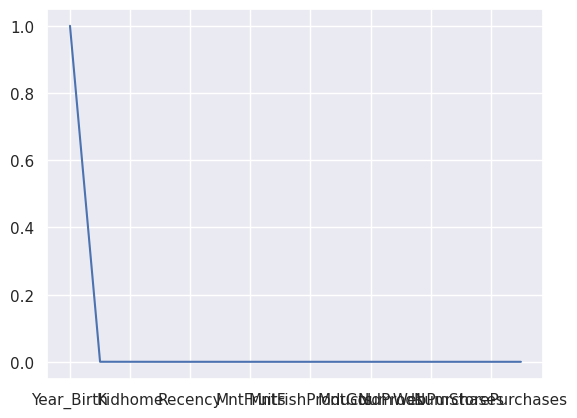

In [ ]:
a.plot()

## Analyse Factorielle des Correspondances (AFC)

In [ ]:
# todo

## Analyse des Correspondances Multiples (ACM)

In [ ]:
# todo

# Régression linéaire

## Modèle simple : une variable à expliquer (Y) et une seule variable explicative (X)

### Hypothèses à vérifier pour la régression linéaire simple

1) coefficient de corrélation linéaire entre X et Y non nul

1) la distribution de l’erreur ε est indépendante de la variable X (exogénéité)

2) l'erreur suit une loi normale centrée i.e. E(ε) = 0

3) l’erreur est de variance constante (homoscédasticité)
i.e Var(εi) = s, s une constante

4) les erreurs sont indépendantes (absence d'autocorrélation)
i.e. Cov(εi, εj) = 0, pour tout i, j

<Axes: xlabel='Income'>

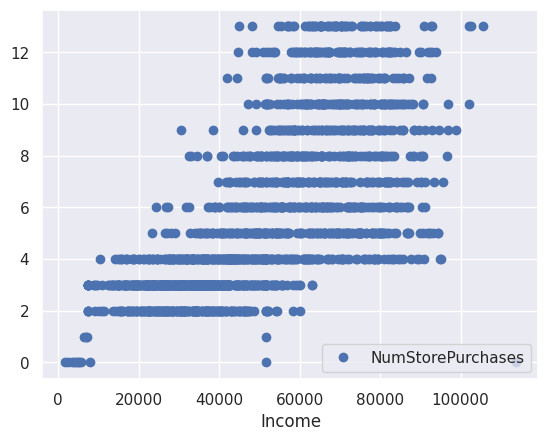

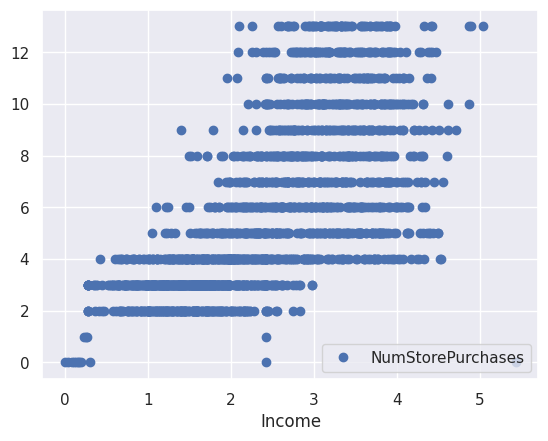

In [ ]:
# demonstration de l efficacite du nettoyage et de la transformation des donnees
df.plot(x="Income", y="NumStorePurchases", style="o")
df_transforme.plot(x="Income", y="NumStorePurchases", style="o")

<Axes: xlabel='Year_Birth'>

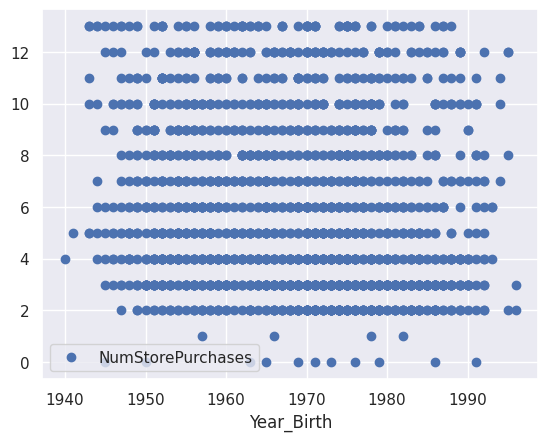

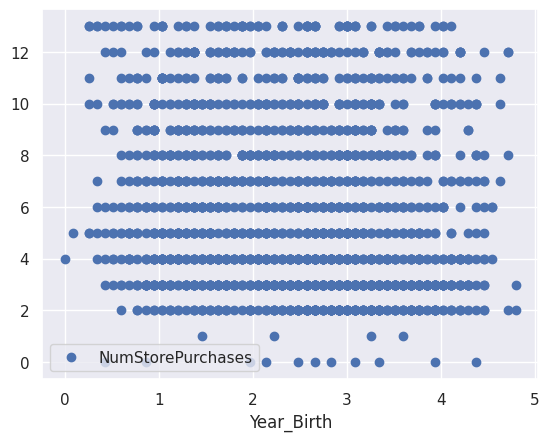

In [ ]:
# un exemple de regression lineaire simple vaine
df.plot(x="Year_Birth", y="NumStorePurchases", style="o")
df_transforme.plot(x="Year_Birth", y="NumStorePurchases", style="o")

<Axes: xlabel='NumStorePurchases'>

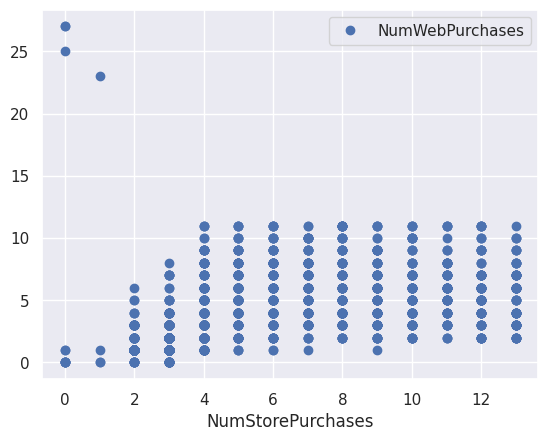

In [ ]:
# un exemple de regression qui devrait etre efficace
df_transforme.plot(x="NumStorePurchases", y="NumWebPurchases", style="o")

<Axes: xlabel='Income'>

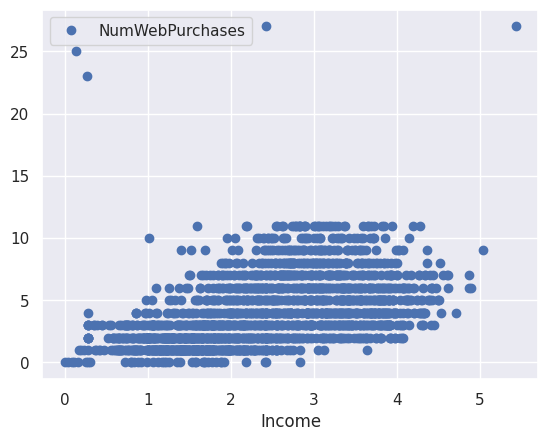

In [ ]:
# on va essayer une regression lineaire simple sur ces deux variables
df_transforme.plot(x="Income", y="NumWebPurchases", style="o")

In [ ]:
# il reste des nan qu on va nettoyer temporairement
na = df_transforme["Income"].isna()
print(sum(na))
na_ = df_transforme["NumWebPurchases"].isna()
print(sum(na_))

df_transforme = df_transforme[~df_transforme["Income"].isna()]

0
0


#### Hypothèse 1 : présence de corrélation linéaire entre X et Y, vérifiée
##### Test de Pearson

In [ ]:
# check hypothese 1

# definition des variables X et Y
income = np.array(df_transforme["Income"]).reshape(-1, 1)
web_purchases = np.array(df_transforme["NumWebPurchases"])

from scipy.stats import pearsonr

print(
    "Le coefficient de corrélation linéaire entre X et Y vaut",
    pearsonr(income.reshape(1, -1)[0], web_purchases)[0],
)

Le coefficient de corrélation linéaire entre X et Y vaut 0.4850098141583113


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
model1 = LinearRegression().fit(income, web_purchases)

#### Résultat de la régression

Le R2 vaut 0.23523451982987975


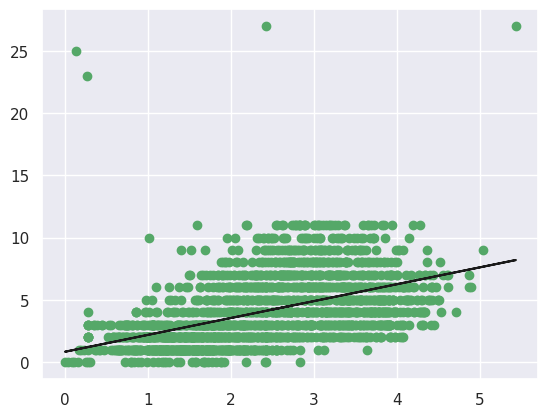

In [ ]:
plt.scatter(income, web_purchases, color="g")
plt.plot(income, model1.predict(income), color="k")

r_sq = model1.score(income, web_purchases)
print(f"Le R2 vaut {r_sq}")

#### Hypothèse 2 : la distribution de l’erreur ε est indépendante de la variable X (exogénéité)
##### independance des erreurs et de la variable explicative X

Le coefficient de corrélation entre X et les residus vaut -2.1013701575253035e-16 les deux variables sont indépendantes


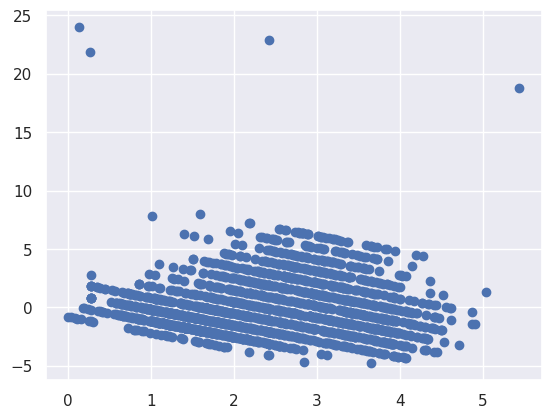

In [ ]:
residuals = web_purchases - model1.predict(income)

plt.scatter(income, residuals)

# test de correlation de pearson
print(
    "Le coefficient de corrélation entre X et les residus vaut",
    pearsonr(income.reshape(1, -1)[0], residuals)[0],
    "les deux variables sont indépendantes",
)

##### independance des erreurs et des valeurs predites

Le coefficient de corrélation entre les résidus et les valeurs prédites vaut -2.0365382557424594e-16 les deux variables sont indépendantes


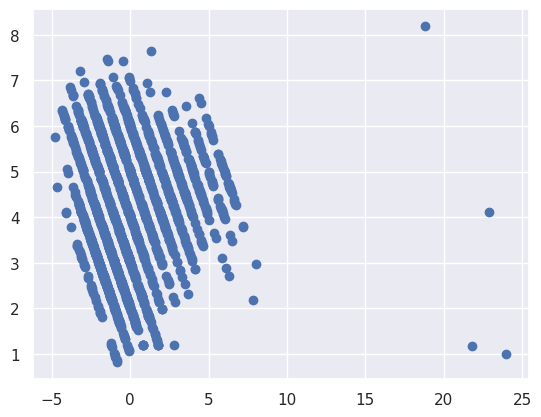

In [ ]:
fitted_values = model1.predict(income)
plt.scatter(residuals, fitted_values)

print(
    "Le coefficient de corrélation entre les résidus et les valeurs prédites vaut",
    pearsonr(fitted_values, residuals)[0],
    "les deux variables sont indépendantes",
)

#### Hypothèse 3 : l'erreur suit une loi normale centrée i.e. E(ε) = 0
##### Affichage de l'histogramme des erreurs et QQplot pour une loi normale

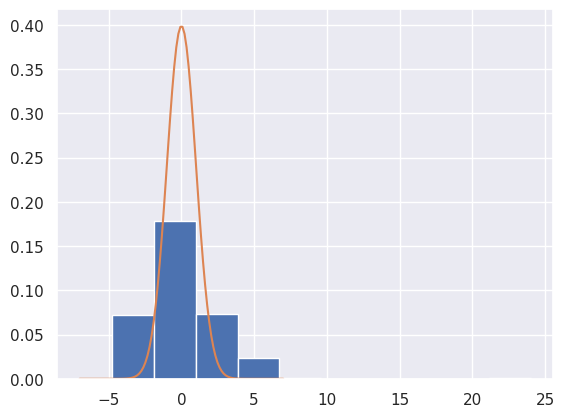

La moyenne des résidus vaut -1.4962223256073013e-16
Mais les résidus ne suivent pas une loi normale
On constate sur le qqplot que les points ne suivent pas la droite x = y


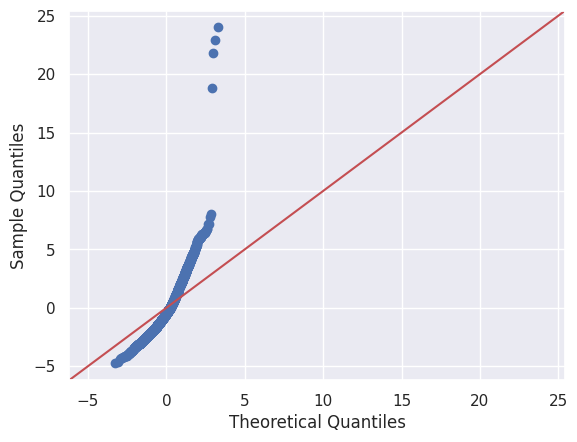

In [ ]:
import statistics
from scipy import stats
import numpy as np
import statsmodels.api as sm

plt.hist(residuals, density=True)

x = np.linspace(-7, 7, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1))
plt.show()

print("La moyenne des résidus vaut", statistics.mean(residuals))
print("Mais les résidus ne suivent pas une loi normale")

sm.qqplot(residuals, line="45")
print("On constate sur le qqplot que les points ne suivent pas la droite x = y")

##### Test de Shapiro

In [ ]:
print(
    "La pvalue vaut",
    stats.shapiro(residuals)[1],
    "donc on rejette l hypothese de normalite",
)

La pvalue vaut 2.4526113146929193e-36 donc on rejette l hypothese de normalite


#### Hypothèse 4 : l’erreur est de variance constante (homoscédasticité) i.e Var(εi) = s, s une constante

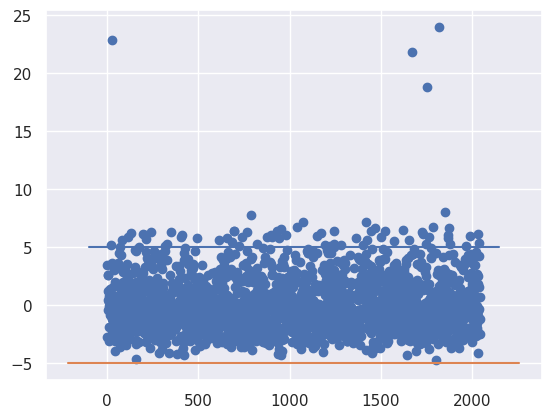

In [ ]:
plt.plot(residuals, "bo")


def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, "-")


abline(0, 5)
abline(0, -5)

#### Hypothèse 5 : absence d'autocorrélation

On remarque une absence d'autocorrélation


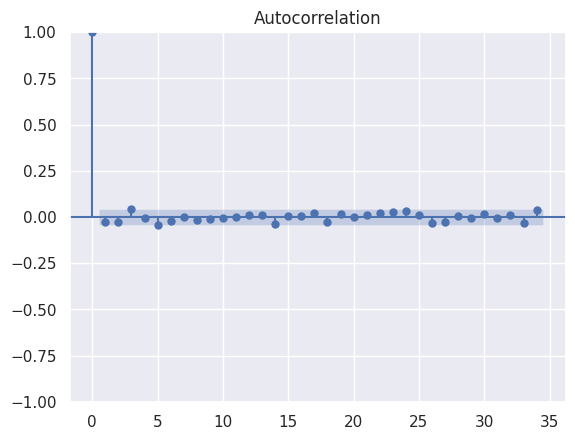

In [ ]:
from statsmodels.graphics.regressionplots import *

sm.graphics.tsa.plot_acf(residuals)
print("On remarque une absence d'autocorrélation")

#### Distance de Cook

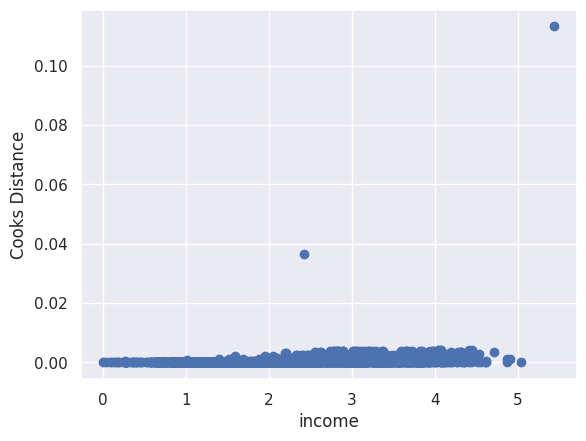

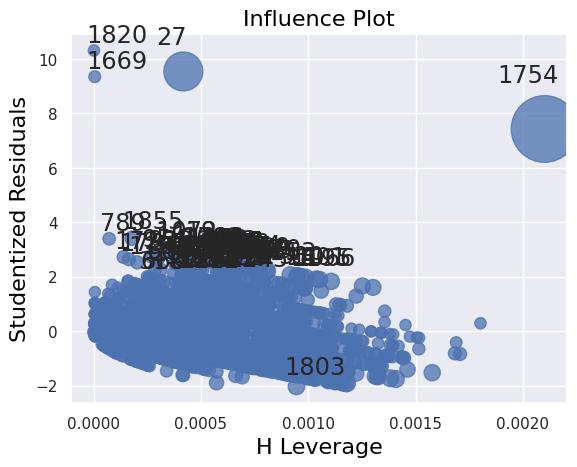

In [ ]:
model_sm = sm.OLS(web_purchases, income).fit()
# on recreer le model avec statsmodel

# create instance of influence
influence = model_sm.get_influence()

# obtain Cook's distance for each observation
cooks = influence.cooks_distance

# display Cook's distances
plt.scatter(income, cooks[0])
plt.xlabel("income")
plt.ylabel("Cooks Distance")
plt.show()

influence_plot(model_sm)
print("")

In [ ]:
# TODO:
# formules
# GLM poissonien sur store purchases

In [ ]:
cooks_bool = cooks[0] > 0.02
cooks_indexes = [i for i, x in enumerate(cooks_bool) if x]
print(cooks_indexes)

[27, 1754]


##### exclusions des valeurs ressortant de l'influence plot

In [ ]:
df_transforme.iloc[[27, 1820, 1669, 1754]]

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
ID                                                                          
5255     3.940164  Graduation         Single  2.425188        1         0   
10311    2.484017  Graduation        Married  0.130995        0         1   
6237     2.227049         PhD         Single  0.262864        0         2   
4619     0.428279         PhD         Single  5.438085        0         0   

      Dt_Customer   Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
ID                                                ...                        
5255   20-02-2013  0.655921       NaN        NaN  ...                    0   
10311  05-10-2013  0.000000       NaN        NaN  ...                    0   
6237   07-12-2013  3.176037       NaN        NaN  ...                    1   
4619   28-05-2014  0.310699       NaN        NaN  ...                    0   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
ID                                                                        
5255                   0                  1             0             0   
10311                  0                  1             0             0   
6237                   1                  0             0             0   
4619                   0                  1             0             0   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
ID                                                                   
5255              0             0             0         0         0  
10311             0             0             0         0         0  
6237              0             0             0         0         0  
4619              0             0             0         0         0  

[4 rows x 26 columns]

In [ ]:
df_transforme = df_transforme.drop(labels=[5255, 10311, 6237, 4619], axis=0)

Le R2 vaut 0.23493380763060745


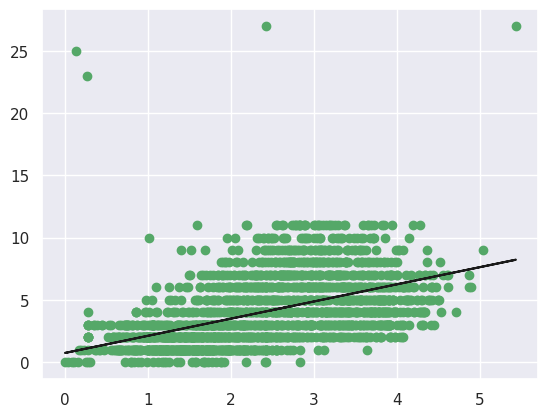

In [ ]:
model1 = LinearRegression().fit(
    np.array(df_transforme["Income"]).reshape(-1, 1), df_transforme["NumWebPurchases"]
)
plt.scatter(income, web_purchases, color="g")
plt.plot(income, model1.predict(income), color="k")

r_sq = model1.score(income, web_purchases)
print(f"Le R2 vaut {r_sq}")

In [ ]:
# UN DEUXIEME EXEMPLE DE REGRESSION SIMPLE

meat = np.array(df["MntMeatProducts"]).reshape(-1, 1)

wines = df["MntWines"]

In [ ]:
model2 = LinearRegression().fit(meat, wines)

[<matplotlib.lines.Line2D>]

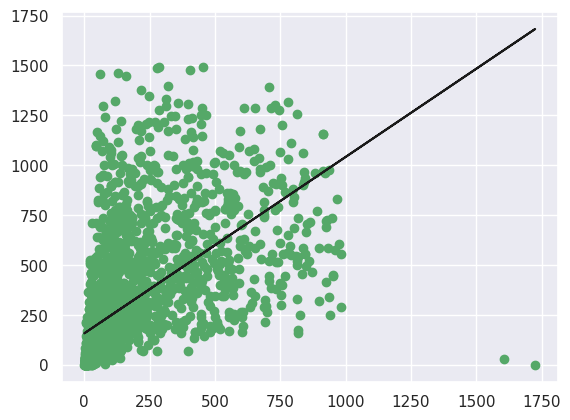

In [ ]:
plt.scatter(meat, wines, color="g")
plt.plot(meat, model2.predict(meat), color="k")

In [ ]:
r_sq = model2.score(meat, wines)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.33752779420768875


In [ ]:
# hypothese 1 : correlation X et Y

print(
    "coeff de corr entre X et Y:",
    pearsonr(meat.reshape(1, -1)[0], wines)[0],
)

coeff de corr entre X et Y: 0.5809714228838527


[<matplotlib.lines.Line2D>]

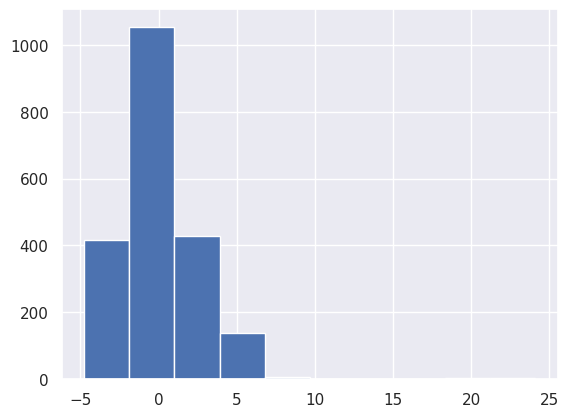

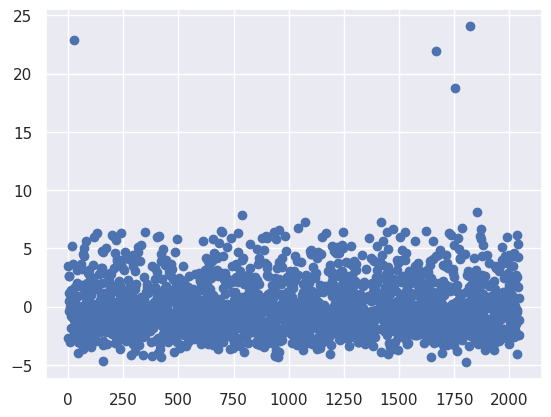

In [ ]:
# check hypothese 2 et 3 : exogeneite et homoscedasticite

residuals = web_purchases - model1.predict(income)
fig1 = plt.figure("distribution des residus")
plt.hist(residuals)
fig2 = plt.figure("variation des residus")
plt.plot(residuals, "bo")
# on a bien les residus suivant une loi normale, centree
# et ont une variance constante

coeff de corr entre X et residus: -0.009222099086539984


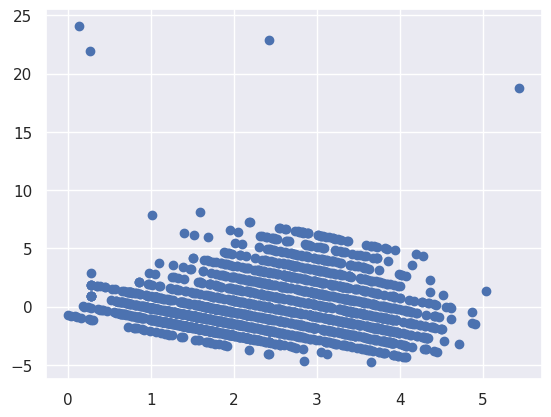

In [ ]:
# independance des erreurs et de la variable explicative X ?

plt.scatter(income, residuals)

# test de correlation de pearson
print(
    "coeff de corr entre X et residus:",
    pearsonr(income.reshape(1, -1)[0], residuals)[0],
)

# OK

## Score du modèle

### Qualité d'ajustement

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
web_predicted = model1.predict(income)

<Axes: ylabel='Count'>

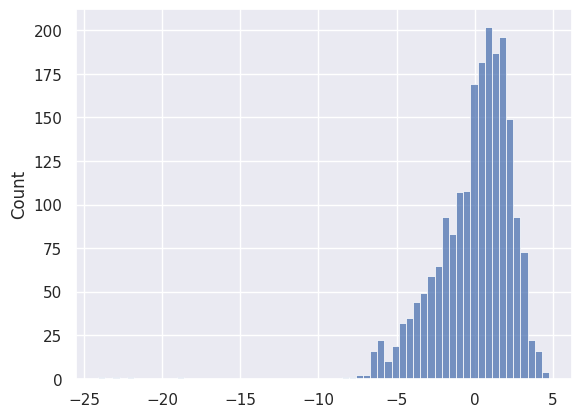

In [ ]:
sns.histplot(web_predicted - web_purchases)

In [ ]:
print(f"MSE = {mean_squared_error(web_purchases, web_predicted)}")
print(f"RMSE = {mean_squared_error(web_purchases, web_predicted, squared=False)}")
print(f"MAE = {mean_absolute_error(web_purchases, web_predicted)}")

MSE = 5.972596770643035
RMSE = 2.443889680538595
MAE = 1.8182907425410988


In [ ]:
# meat / wines
wines_predicted = model2.predict(meat)

<Axes: xlabel='MntWines', ylabel='Count'>

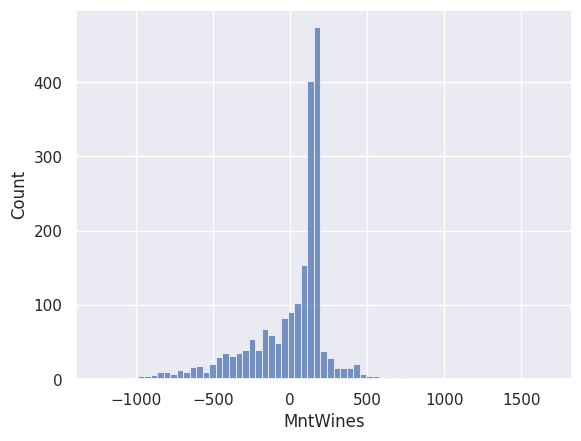

In [ ]:
sns.histplot(wines_predicted - wines)

In [ ]:
print(f"MSE = {mean_squared_error(wines, wines_predicted)}")
print(f"RMSE = {mean_squared_error(wines, wines_predicted, squared=False)}")
print(f"MAE = {mean_absolute_error(wines, wines_predicted)}")

MSE = 75225.93309817121
RMSE = 274.27346407950444
MAE = 205.1048871460377


### Qualité de prédiction

In [ ]:
# todo: train/test split, cross-validation

## Modèle à plusieurs variables explicatives

In [ ]:
X = df_transforme[
    ["Income", "NumWebPurchases", "NumDealsPurchases", "NumStorePurchases"]
]
# Y = df_transforme[""]